## BHypoFearSurvey

Analizamos una base de datos del estudio "SEVERE HYPOGLYCEMIA IN  OLDER ADULTS WITH TYPE 1 DIABETES, A Study to Identify Factors Associated  with the Occurrence of Severe Hypoglycemia in Older Adults with T1D" 
Recordemos que la hipoglicemia son niveles bajos de azúcar en sangre.

Abordamos un problema de clasificación que nuestra salida será si es un paciente caso o control 
 - Caso. evento SH (Severe Hipoglucemia) en los últimos 12 meses
 - Control . NO SH en los últimos 3 años.

In [1]:
#importamos los módulos necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from scipy import stats

In [2]:
#Cargamos la base de datos y la guardamos en un dataframe
data = pd.read_csv("BHypoFearSurvey.csv", sep = ";",encoding = "utf8") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
data.head() # Muestra las primeras 5 filas

,RecID,PtID,HypoFearSurvNotDone,HypoFearSurvCompDaysFromEnroll,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,9,199,NaN,0.0,2.0,4.0,2.0,3.0,2.0,4.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,19,56,NaN,0.0,2.0,0.0,4.0,1.0,4.0,4.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,14,201,NaN,0.0,0.0,0.0,2.0,0.0,4.0,3.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,15,107,NaN,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,18,47,NaN,11.0,4.0,4.0,3.0,3.0,4.0,3.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


In [3]:
#Cargamos la base de datos y la guardamos en un dataframe
roster = pd.read_csv("BPtRoster.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
roster.head() # Muestra las primeras 5 filas

,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [4]:
data1 = pd.merge(roster,data, on = "PtID")
data1.head()

,RecID_x,PtID,BCaseControlStatus,RecID_y,HypoFearSurvNotDone,HypoFearSurvCompDaysFromEnroll,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,6,199,Case,9,NaN,0.0,2.0,4.0,2.0,3.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,9,56,Control,19,NaN,0.0,2.0,0.0,4.0,1.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,10,201,Case,14,NaN,0.0,0.0,0.0,2.0,0.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,11,107,Control,15,NaN,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,26,47,Case,18,NaN,11.0,4.0,4.0,3.0,3.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


In [5]:
data1 = data1.drop(columns = ["HypoFearSurvNotDone","RecID_x","RecID_y", "PtID"])

# Preprocesado
### Eliminar Outliers

Reemplazamos por la moda los valores nulos

In [6]:
data1.isnull().sum()

BCaseControlStatus                0
HypoFearSurvCompDaysFromEnroll    1
LgSnackBed                        1
AvoidAloneLowBG                   1
TestBGRunHigh                     2
HighBGAlone                       1
EatFirstSignLowBG                 1
RedInsThinkLowBG                  1
KeepHighBGMtg                     1
CarryFastActSug                   1
AvoidExThinkLowBG                 1
CkSugOftMtg                       1
WorryNotRecLowBG                  1
WorryNoFood                       1
WorryPassOut                      1
WorryEmbarSocial                  1
WorryReacAlone                    1
WorryAppStupDrunk                 1
WorryLoseCntrl                    1
WorryNoHelp                       1
WorryReactDrive                   2
WorryMistAcc                      1
WorryBadEvalCrit                  1
WorryRespForOthers                1
WorryDizzy                        1
dtype: int64

In [7]:
df_nonnan_HypoFearSurvCompDaysFromEnroll = data1["HypoFearSurvCompDaysFromEnroll"].dropna()
df_nonnan_LgSnackBed = data1["LgSnackBed"].dropna()
df_nonnan_AvoidAloneLowBG = data1["AvoidAloneLowBG"].dropna()
df_nonnan_TestBGRunHigh = data1["TestBGRunHigh"].dropna()
df_nonnan_HighBGAlone = data1["HighBGAlone"].dropna()
df_nonnan_EatFirstSignLowBG = data1["EatFirstSignLowBG"].dropna()
df_nonnan_RedInsThinkLowBG = data1["RedInsThinkLowBG"].dropna()
df_nonnan_KeepHighBGMtg = data1["KeepHighBGMtg"].dropna()
df_nonnan_CarryFastActSug = data1["CarryFastActSug"].dropna()
df_nonnan_AvoidExThinkLowBG = data1["AvoidExThinkLowBG"].dropna()
df_nonnan_CkSugOftMtg = data1["CkSugOftMtg"].dropna()
df_nonnan_WorryNotRecLowBG = data1["WorryNotRecLowBG"].dropna()
df_nonnan_WorryNoFood = data1["WorryNoFood"].dropna()
df_nonnan_WorryPassOut = data1["WorryPassOut"].dropna()
df_nonnan_WorryEmbarSocial = data1["WorryEmbarSocial"].dropna()
df_nonnan_WorryReacAlone = data1["WorryReacAlone"].dropna()
df_nonnan_WorryAppStupDrunk = data1["WorryAppStupDrunk"].dropna()
df_nonnan_WorryLoseCntrl = data1["WorryLoseCntrl"].dropna()
df_nonnan_WorryNoHelp = data1["WorryNoHelp"].dropna()
df_nonnan_WorryReactDrive = data1["WorryReactDrive"].dropna()
df_nonnan_WorryMistAcc = data1["WorryMistAcc"].dropna()
df_nonnan_WorryBadEvalCrit = data1["WorryBadEvalCrit"].dropna()
df_nonnan_WorryRespForOthers = data1["WorryRespForOthers"].dropna()
df_nonnan_WorryDizzy = data1["WorryDizzy"].dropna()

In [8]:
mode_HypoFearSurvCompDaysFromEnroll = stats.mode(df_nonnan_HypoFearSurvCompDaysFromEnroll.values)[0][0]
mode_LgSnackBed = stats.mode(df_nonnan_LgSnackBed.values)[0][0]
mode_AvoidAloneLowBG = stats.mode(df_nonnan_AvoidAloneLowBG.values)[0][0]
mode_TestBGRunHigh =  stats.mode(df_nonnan_TestBGRunHigh.values)[0][0]
mode_HighBGAlone = stats.mode(df_nonnan_HighBGAlone.values)[0][0]
mode_EatFirstSignLowBG = stats.mode(df_nonnan_EatFirstSignLowBG.values)[0][0]
mode_RedInsThinkLowBG = stats.mode(df_nonnan_RedInsThinkLowBG.values)[0][0]
mode_KeepHighBGMtg =  stats.mode(df_nonnan_KeepHighBGMtg.values)[0][0]
mode_CarryFastActSug = stats.mode(df_nonnan_CarryFastActSug.values)[0][0]
mode_AvoidExThinkLowBG = stats.mode(df_nonnan_AvoidExThinkLowBG.values)[0][0]
mode_CkSugOftMtg = stats.mode(df_nonnan_CkSugOftMtg.values)[0][0]
mode_WorryNotRecLowBG = stats.mode(df_nonnan_WorryNotRecLowBG.values)[0][0]
mode_WorryNoFood = stats.mode(df_nonnan_WorryNoFood.values)[0][0]
mode_WorryPassOut = stats.mode(df_nonnan_WorryPassOut.values)[0][0]
mode_WorryEmbarSocial = stats.mode(df_nonnan_WorryEmbarSocial.values)[0][0]
mode_WorryReacAlone = stats.mode(df_nonnan_WorryReacAlone.values)[0][0]
mode_WorryAppStupDrunk = stats.mode(df_nonnan_WorryAppStupDrunk.values)[0][0]
mode_WorryLoseCntrl = stats.mode(df_nonnan_WorryLoseCntrl.values)[0][0]
mode_WorryNoHelp = stats.mode(df_nonnan_WorryNoHelp.values)[0][0]
mode_WorryReactDrive = stats.mode(df_nonnan_WorryReactDrive.values)[0][0]
mode_WorryMistAcc = stats.mode(df_nonnan_WorryMistAcc.values)[0][0]
mode_WorryBadEvalCrit = stats.mode(df_nonnan_WorryBadEvalCrit.values)[0][0]
mode_WorryRespForOthers = stats.mode(df_nonnan_WorryRespForOthers.values)[0][0]
mode_WorryDizzy = stats.mode(df_nonnan_WorryDizzy.values)[0][0]

In [9]:
data1["HypoFearSurvCompDaysFromEnroll"].fillna(mode_HypoFearSurvCompDaysFromEnroll, inplace = True) 
data1["LgSnackBed"].fillna(mode_LgSnackBed, inplace = True)
data1["AvoidAloneLowBG"].fillna(mode_AvoidAloneLowBG, inplace = True) 
data1["TestBGRunHigh"].fillna(mode_TestBGRunHigh, inplace = True) 
data1["HighBGAlone"].fillna(mode_HighBGAlone, inplace = True) 
data1["EatFirstSignLowBG"].fillna(mode_EatFirstSignLowBG, inplace = True) 
data1["RedInsThinkLowBG"].fillna(mode_RedInsThinkLowBG, inplace = True) 
data1["KeepHighBGMtg"].fillna(mode_KeepHighBGMtg, inplace = True) 
data1["CarryFastActSug"].fillna(mode_CarryFastActSug, inplace = True) 
data1["AvoidExThinkLowBG"].fillna(mode_AvoidExThinkLowBG, inplace = True) 
data1["CkSugOftMtg"].fillna(mode_CkSugOftMtg, inplace = True) 
data1["WorryNotRecLowBG"].fillna(mode_WorryNotRecLowBG, inplace = True) 
data1["WorryNoFood"].fillna(mode_WorryNoFood, inplace = True) 
data1["WorryPassOut"].fillna(mode_WorryPassOut, inplace = True) 
data1["WorryEmbarSocial"].fillna(mode_WorryEmbarSocial, inplace = True) 
data1["WorryReacAlone"].fillna(mode_WorryReacAlone, inplace = True) 
data1["WorryAppStupDrunk"].fillna(mode_WorryAppStupDrunk, inplace = True) 
data1["WorryLoseCntrl"].fillna(mode_WorryLoseCntrl, inplace = True) 
data1["WorryNoHelp"].fillna(mode_WorryNoHelp, inplace = True) 
data1["WorryReactDrive"].fillna(mode_WorryReactDrive, inplace = True) 
data1["WorryMistAcc"].fillna(mode_WorryMistAcc, inplace = True) 
data1["WorryBadEvalCrit"].fillna(mode_WorryBadEvalCrit, inplace = True) 
data1["WorryRespForOthers"].fillna(mode_WorryRespForOthers, inplace = True) 
data1["WorryDizzy"].fillna(mode_WorryDizzy, inplace = True) 

In [10]:
data1.isnull().sum()  
        

BCaseControlStatus                0
HypoFearSurvCompDaysFromEnroll    0
LgSnackBed                        0
AvoidAloneLowBG                   0
TestBGRunHigh                     0
HighBGAlone                       0
EatFirstSignLowBG                 0
RedInsThinkLowBG                  0
KeepHighBGMtg                     0
CarryFastActSug                   0
AvoidExThinkLowBG                 0
CkSugOftMtg                       0
WorryNotRecLowBG                  0
WorryNoFood                       0
WorryPassOut                      0
WorryEmbarSocial                  0
WorryReacAlone                    0
WorryAppStupDrunk                 0
WorryLoseCntrl                    0
WorryNoHelp                       0
WorryReactDrive                   0
WorryMistAcc                      0
WorryBadEvalCrit                  0
WorryRespForOthers                0
WorryDizzy                        0
dtype: int64

In [11]:
# Cambiamos la variable Caso -1 , Control-0
data_output = data1["BCaseControlStatus"].replace(["Case", "Control"],[1, 0])

In [12]:
data_input = data1.drop(columns = ["BCaseControlStatus"])

In [13]:
data_input

,HypoFearSurvCompDaysFromEnroll,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,KeepHighBGMtg,CarryFastActSug,AvoidExThinkLowBG,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,0.0,2.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,0.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,0.0,2.0,0.0,4.0,1.0,4.0,4.0,1.0,3.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,2.0,0.0,4.0,3.0,1.0,3.0,0.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,2.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,11.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,8.0,4.0,0.0,0.0,2.0,2.0,4.0,2.0,4.0,0.0,...,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,3.0
197,8.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
198,8.0,4.0,0.0,2.0,0.0,1.0,3.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
199,11.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,4.0,4.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0


## Gráfico de barras en función de la salida. 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


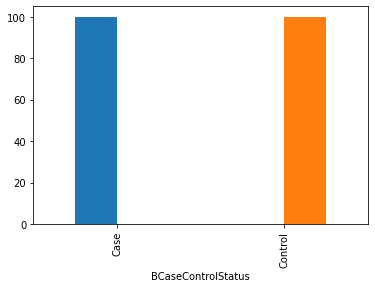

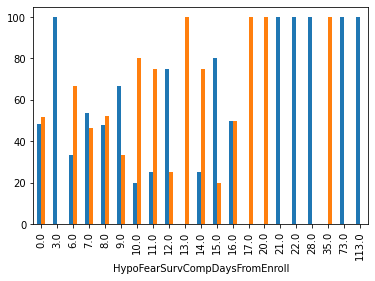

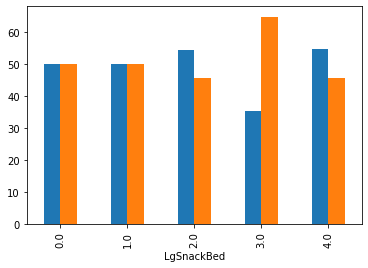

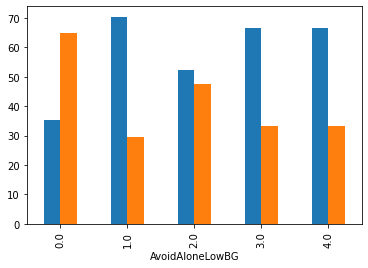

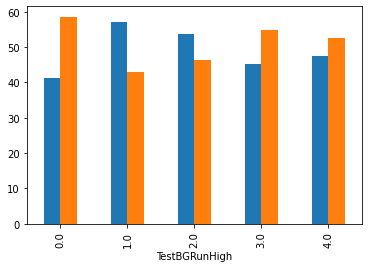

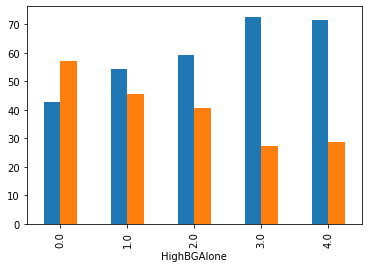

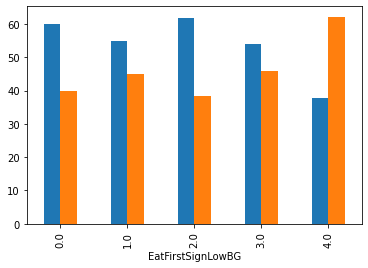

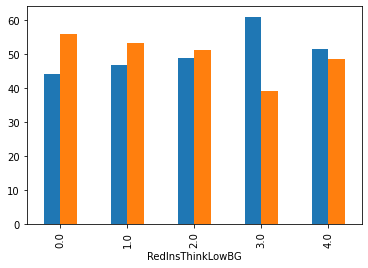

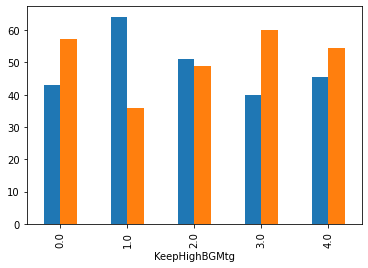

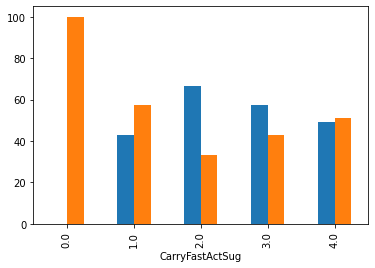

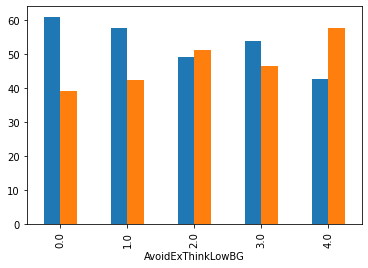

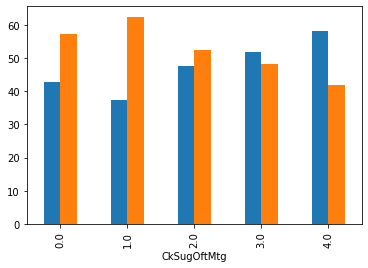

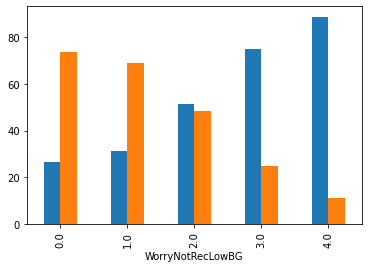

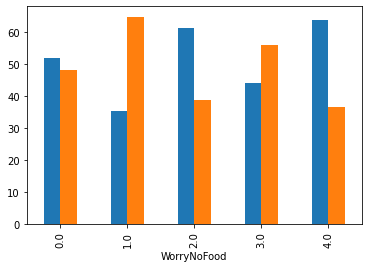

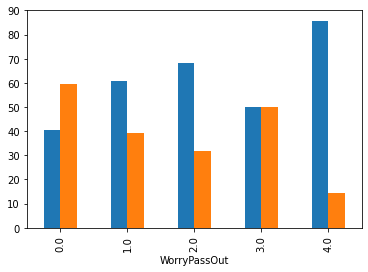

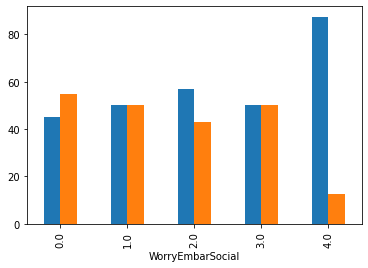

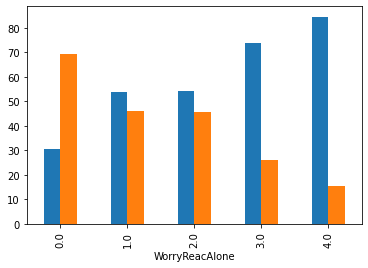

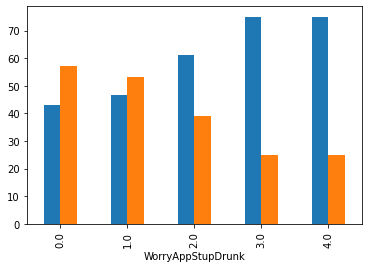

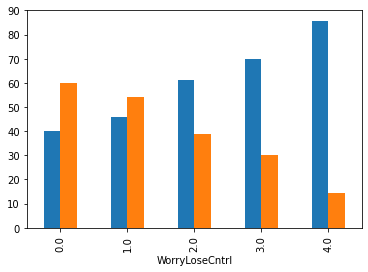

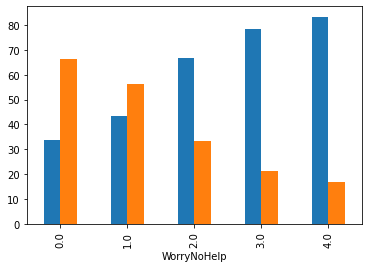

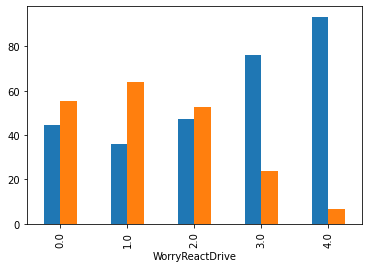

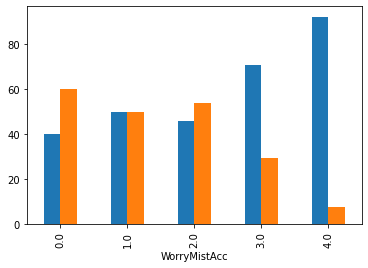

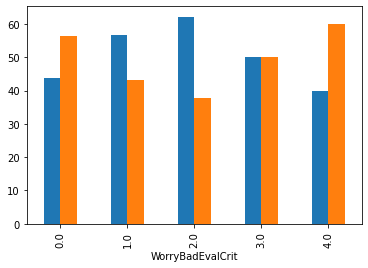

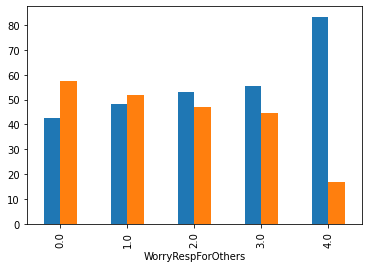

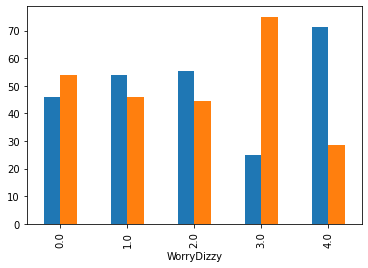

In [14]:
for element in data1.columns:
    
    plot = pd.crosstab(index=data1[element],
            columns=data1['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', legend = "")

In [15]:
data_input = data_input.iloc[:,1:]

In [16]:
data_input.head()

,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,KeepHighBGMtg,CarryFastActSug,AvoidExThinkLowBG,CkSugOftMtg,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,2.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,0.0,3.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,2.0,0.0,4.0,1.0,4.0,4.0,1.0,3.0,0.0,4.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,2.0,0.0,4.0,3.0,1.0,3.0,0.0,0.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,2.0,4.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


In [17]:
list_cat_features=['LgSnackBed','AvoidAloneLowBG','TestBGRunHigh', "HighBGAlone", "EatFirstSignLowBG", "RedInsThinkLowBG", "KeepHighBGMtg", "CarryFastActSug", "AvoidExThinkLowBG", "CkSugOftMtg", "WorryNotRecLowBG", "WorryNoFood", "WorryPassOut" , "WorryReacAlone", "WorryEmbarSocial", "WorryAppStupDrunk", "WorryLoseCntrl", "WorryNoHelp", "WorryReactDrive", "WorryMistAcc", "WorryBadEvalCrit",  "WorryBadEvalCrit", "WorryRespForOthers", "WorryDizzy"]

from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):
    counter_samples = Counter(x)
    dict_counter_samples = dict(counter_samples)

    x_unique = np.array(list(dict_counter_samples.keys()))
    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

In [18]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
n_samples=data1.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
    high=data1[data1.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
    high2=data1[data1.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
    x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
    x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
    plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
    plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
    plt.xticks(y_pos1, x_unique1, rotation=90, fontsize = 16)
    plt.yticks(fontsize = 20)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
    plt.tight_layout()
    plt.savefig("{}.pdf".format(column_name))
    plt.close()

# Modelos de Machine Learning

In [19]:
model   =[]
mean = []
std = []

model2   =[]
mean2 = []
std2 = []

# KNN

In [20]:
def knn (X_train,X_test,Y_train,Y_test,seed):
    param_grid = {'n_neighbors': range(1,50,2)}
    k_grid = np.array(range(1,50,2))
    grid_knn = GridSearchCV(KNeighborsClassifier(metric = 'hamming'), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)

    grid_knn.fit(X_train, Y_train) 
      #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
    auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])

    plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
    plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
    plt.xlabel('k',fontsize=14)
    plt.ylabel('roc_auc',fontsize=14)
    plt.legend()
    plt.show()
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
    print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))
      # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol

    grid_knn.get_params()
      # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test

    kNN_clasif_all = grid_knn.best_estimator_
    modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)
    y_output_knn2 = modelo_knn_clasif2.predict(X_test)
    print(accuracy_score(Y_test, y_output_knn2))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
    Sensibilidad= recall_score(Y_test, y_output_knn2)
    Accuracy = accuracy_score(Y_test, y_output_knn2)
    Especificidad = tn / (tn + fp)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 23) (160,) (41, 23) (41,)


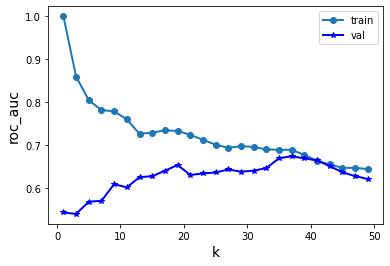

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.674
Valor correspondiente para el hiperparámetro: {'n_neighbors': 37}
0.7317073170731707
Sensibilidad y Accuracy 0.6190476190476191 0.7317073170731707


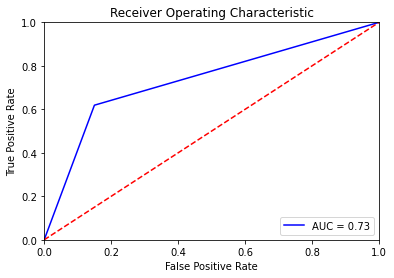

(160, 23) (160,) (41, 23) (41,)


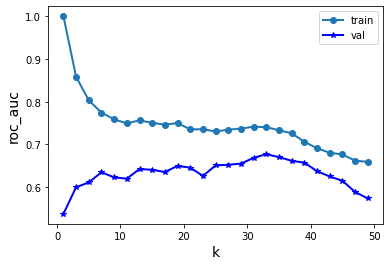

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.677
Valor correspondiente para el hiperparámetro: {'n_neighbors': 33}
0.6341463414634146
Sensibilidad y Accuracy 0.5238095238095238 0.6341463414634146


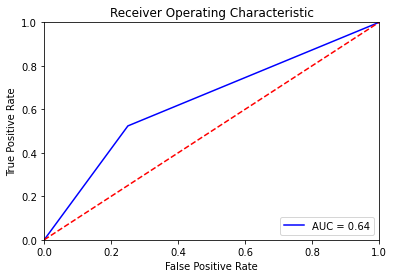

(160, 23) (160,) (41, 23) (41,)


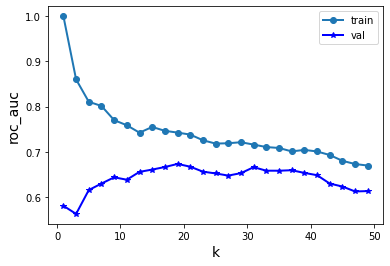

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.673
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.6341463414634146
Sensibilidad y Accuracy 0.5238095238095238 0.6341463414634146


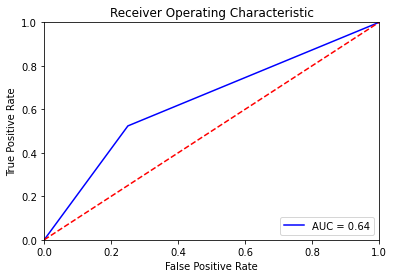

(160, 23) (160,) (41, 23) (41,)


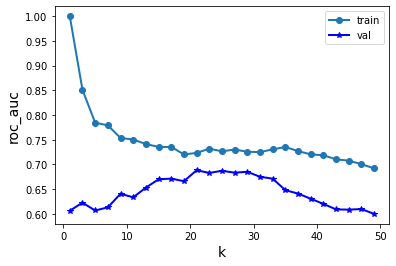

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.688
Valor correspondiente para el hiperparámetro: {'n_neighbors': 21}
0.6097560975609756
Sensibilidad y Accuracy 0.42857142857142855 0.6097560975609756


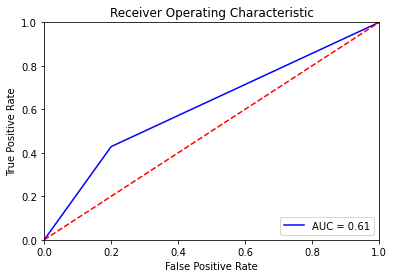

(160, 23) (160,) (41, 23) (41,)


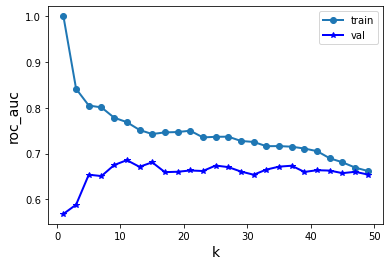

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.686
Valor correspondiente para el hiperparámetro: {'n_neighbors': 11}
0.5365853658536586
Sensibilidad y Accuracy 0.5238095238095238 0.5365853658536586


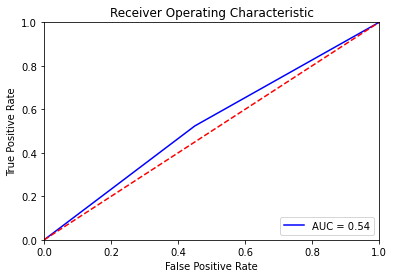

In [21]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []

especificidad = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)


    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])

In [22]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...

print(media_knn, desviacion_estandar_knn)
model.append("KNN")
mean.append(media_knn)
std.append(desviacion_estandar_knn)

0.6292682926829268 0.0698430295769578


In [23]:
media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...

print(media_knn2, desviacion_estandar_knn2)
model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)

0.6319047619047619 0.07056220619645237


In [24]:
media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.5238095238095238 0.06734350297014739
0.74 0.11401754250991378


# SVC

In [25]:
from sklearn.svm import SVC
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo')
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)


    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

    Sensibilidad= recall_score(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 23) (160,) (41, 23) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.723
0.7073170731707317
[[15  5]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.7073170731707317


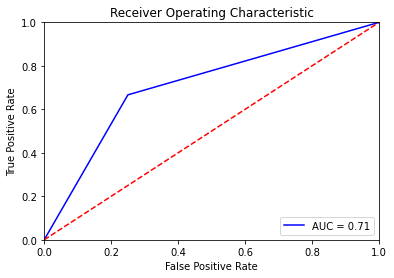

(160, 23) (160,) (41, 23) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.723
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad y Accuracy 0.6190476190476191 0.6097560975609756


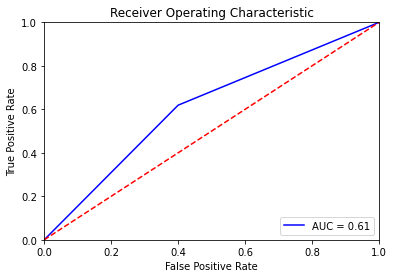

(160, 23) (160,) (41, 23) (41,)
Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.718
0.6829268292682927
[[13  7]
 [ 6 15]]
Sensibilidad y Accuracy 0.7142857142857143 0.6829268292682927


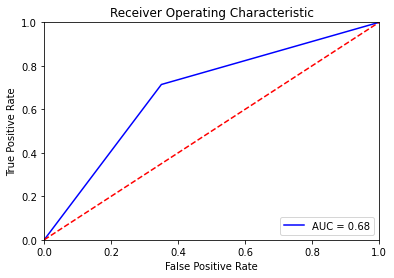

(160, 23) (160,) (41, 23) (41,)
Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.737
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad y Accuracy 0.6190476190476191 0.6097560975609756


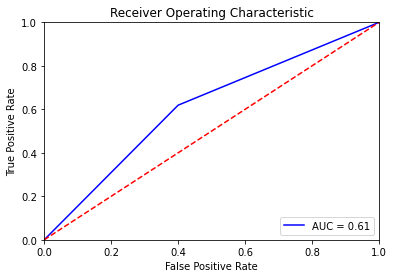

(160, 23) (160,) (41, 23) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.745
0.5853658536585366
[[10 10]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.5853658536585366


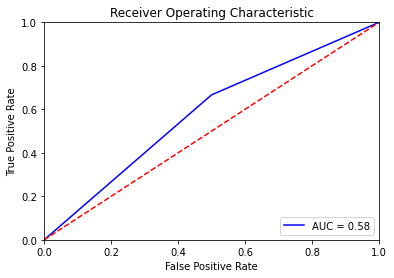

[0.6666666666666666, 0.6190476190476191, 0.7142857142857143, 0.6190476190476191, 0.6666666666666666] [0.7073170731707317, 0.6097560975609756, 0.6829268292682927, 0.6097560975609756, 0.5853658536585366] [0.7083333333333334, 0.6095238095238096, 0.6821428571428572, 0.6095238095238096, 0.5833333333333333]


In [26]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])


print(sensi, accuracy, roc)

In [27]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model.append("SVM")
mean.append(media_svc)
std.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2.append("SVM")
mean2.append(media_svc2)
std2.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

media_knn3 = statistics.mean(espe) # 7
desviacion_estandar_knn3 = statistics.stdev(espe) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

0.6390243902439025 0.05287678875287513
0.6385714285714286 0.0536282767156662
0.6571428571428571 0.03984095364447978
0.62 0.09082951062292476


## DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_train, X_test, Y_train, Y_test,seed):
    
    std_all = preprocessing.StandardScaler().fit(X_train) #Extraemos las características y hacemos la estadndarización
    X_std_all_train = std_all.transform(X_train) #tiene las 8 características estandarizadas
    X_std_all_test = std_all.transform(X_test)
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,9)}
    profundidad_grid = np.array(range(1,9))

    print(X_std_all_train)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_std_all_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    
    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    print(grid_arbol_clasif.get_params())


    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_std_all_train, Y_train)

    y_output_arbol = modelo_arbol_clasif.predict(X_std_all_test)
    print(accuracy_score(Y_test, y_output_arbol))
    print(confusion_matrix(Y_test, y_output_arbol))

    Sensibilidad= recall_score(Y_test, y_output_arbol)
    Accuracy = accuracy_score(Y_test, y_output_arbol)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
    Especificidad = tn / (tn + fp)

    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)




In [29]:
data_input.head()

,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,KeepHighBGMtg,CarryFastActSug,AvoidExThinkLowBG,CkSugOftMtg,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,2.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,0.0,3.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,2.0,0.0,4.0,1.0,4.0,4.0,1.0,3.0,0.0,4.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,2.0,0.0,4.0,3.0,1.0,3.0,0.0,0.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,2.0,4.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


(160, 23) (160,) (41, 23) (41,)
     LgSnackBed  AvoidAloneLowBG  TestBGRunHigh  HighBGAlone  \
26          1.0              0.0            2.0          1.0   
1           2.0              0.0            4.0          1.0   
162         2.0              0.0            0.0          0.0   
25          0.0              0.0            4.0          0.0   
94          0.0              0.0            1.0          4.0   

     EatFirstSignLowBG  RedInsThinkLowBG  KeepHighBGMtg  CarryFastActSug  \
26                 3.0               3.0            2.0              1.0   
1                  4.0               4.0            1.0              3.0   
162                1.0               1.0            2.0              4.0   
25                 4.0               0.0            1.0              4.0   
94                 4.0               0.0            0.0              4.0   

     AvoidExThinkLowBG  CkSugOftMtg  ...  WorryEmbarSocial  WorryReacAlone  \
26                 2.0          1.0  ...        

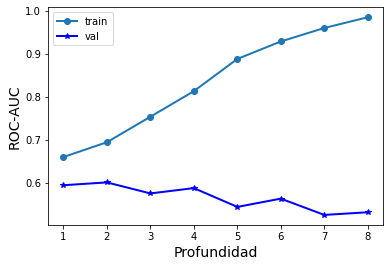

Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6341463414634146
[[10 10]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.6341463414634146


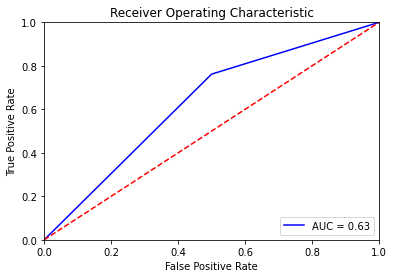

(160, 23) (160,) (41, 23) (41,)
     LgSnackBed  AvoidAloneLowBG  TestBGRunHigh  HighBGAlone  \
150         2.0              1.0            3.0          3.0   
197         2.0              0.0            0.0          0.0   
58          0.0              1.0            1.0          1.0   
161         1.0              1.0            2.0          1.0   
86          2.0              1.0            3.0          1.0   

     EatFirstSignLowBG  RedInsThinkLowBG  KeepHighBGMtg  CarryFastActSug  \
150                3.0               2.0            1.0              1.0   
197                3.0               3.0            0.0              4.0   
58                 3.0               2.0            1.0              4.0   
161                2.0               2.0            4.0              4.0   
86                 3.0               2.0            2.0              3.0   

     AvoidExThinkLowBG  CkSugOftMtg  ...  WorryEmbarSocial  WorryReacAlone  \
150                2.0          3.0  ...        

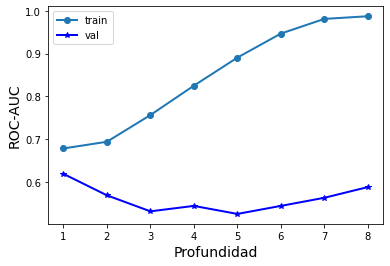

Mejor ROC-AUC en validación cruzada: 0.619
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6585365853658537
[[17  3]
 [11 10]]
Sensibilidad y Accuracy 0.47619047619047616 0.6585365853658537


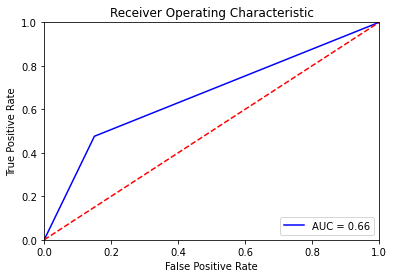

(160, 23) (160,) (41, 23) (41,)
     LgSnackBed  AvoidAloneLowBG  TestBGRunHigh  HighBGAlone  \
131         2.0              3.0            3.0          2.0   
30          3.0              1.0            1.0          1.0   
168         0.0              0.0            3.0          1.0   
154         2.0              1.0            4.0          2.0   
28          3.0              0.0            2.0          0.0   

     EatFirstSignLowBG  RedInsThinkLowBG  KeepHighBGMtg  CarryFastActSug  \
131                2.0               3.0            2.0              4.0   
30                 2.0               0.0            1.0              4.0   
168                0.0               4.0            0.0              4.0   
154                2.0               0.0            1.0              4.0   
28                 1.0               4.0            3.0              4.0   

     AvoidExThinkLowBG  CkSugOftMtg  ...  WorryEmbarSocial  WorryReacAlone  \
131                3.0          1.0  ...        

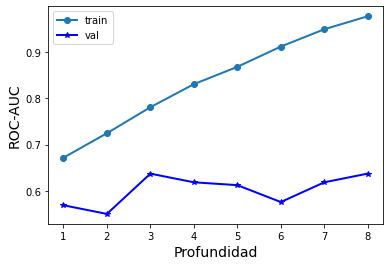

Mejor ROC-AUC en validación cruzada: 0.637
Mejor valor del hiperparámetro: {'max_depth': 8}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5609756097560976
[[11  9]
 [ 9 12]]
Sensibilidad y Accuracy 0.5714285714285714 0.5609756097560976


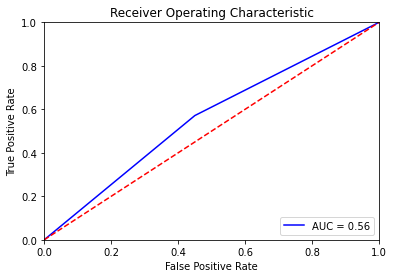

(160, 23) (160,) (41, 23) (41,)
     LgSnackBed  AvoidAloneLowBG  TestBGRunHigh  HighBGAlone  \
77          1.0              2.0            1.0          0.0   
147         0.0              0.0            1.0          0.0   
51          1.0              0.0            2.0          0.0   
157         2.0              0.0            2.0          0.0   
65          1.0              2.0            3.0          1.0   

     EatFirstSignLowBG  RedInsThinkLowBG  KeepHighBGMtg  CarryFastActSug  \
77                 0.0               2.0            1.0              4.0   
147                4.0               2.0            0.0              4.0   
51                 4.0               0.0            0.0              4.0   
157                3.0               2.0            3.0              4.0   
65                 3.0               3.0            2.0              4.0   

     AvoidExThinkLowBG  CkSugOftMtg  ...  WorryEmbarSocial  WorryReacAlone  \
77                 2.0          3.0  ...        

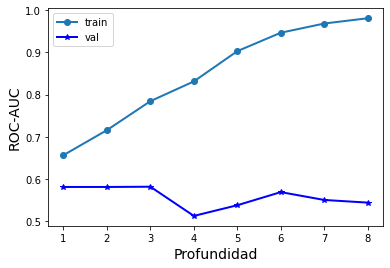

Mejor ROC-AUC en validación cruzada: 0.581
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad y Accuracy 0.6190476190476191 0.6097560975609756


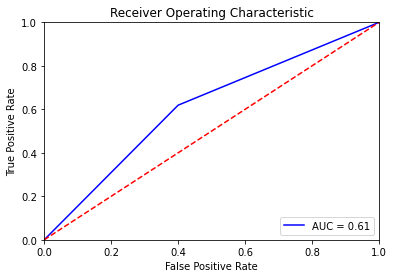

(160, 23) (160,) (41, 23) (41,)
    LgSnackBed  AvoidAloneLowBG  TestBGRunHigh  HighBGAlone  \
54         0.0              1.0            1.0          0.0   
28         3.0              0.0            2.0          0.0   
25         0.0              0.0            4.0          0.0   
21         1.0              0.0            3.0          0.0   
24         1.0              0.0            0.0          0.0   

    EatFirstSignLowBG  RedInsThinkLowBG  KeepHighBGMtg  CarryFastActSug  \
54                3.0               2.0            0.0              4.0   
28                1.0               4.0            3.0              4.0   
25                4.0               0.0            1.0              4.0   
21                4.0               0.0            0.0              4.0   
24                1.0               0.0            1.0              3.0   

    AvoidExThinkLowBG  CkSugOftMtg  ...  WorryEmbarSocial  WorryReacAlone  \
54                4.0          4.0  ...               0.0    

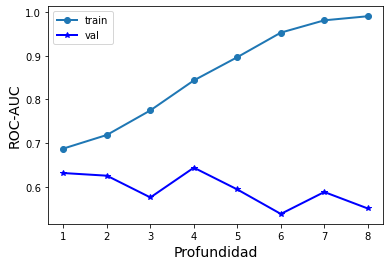

Mejor ROC-AUC en validación cruzada: 0.644
Mejor valor del hiperparámetro: {'max_depth': 4}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6097560975609756
[[10 10]
 [ 6 15]]
Sensibilidad y Accuracy 0.7142857142857143 0.6097560975609756


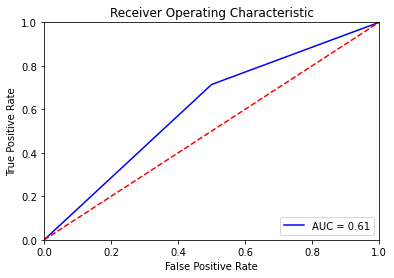

[0.7619047619047619, 0.47619047619047616, 0.5714285714285714, 0.6190476190476191, 0.7142857142857143] [0.6341463414634146, 0.6585365853658537, 0.5609756097560976, 0.6097560975609756, 0.6097560975609756] [0.6309523809523809, 0.6630952380952381, 0.5607142857142857, 0.6095238095238096, 0.6071428571428572]


In [30]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
especificidad = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    print(X_train.head())
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [31]:
import statistics
media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...

print(media_sen_logarit, desviacion_estandar_sen_logarit)
model.append("DT")
mean.append(media_sen_logarit)
std.append(desviacion_estandar_sen_logarit)


media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...
print(media_log, desviacion_estandar_log)

model2.append("DT")
mean2.append(media_log)
std2.append(desviacion_estandar_log)


media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.6146341463414634 0.03617657798583249
0.6142857142857143 0.0374290712434821
0.6285714285714286 0.11368891796488878
0.6 0.1457737973711325


# Regresión Logística

In [32]:

from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

def regr_Logistica(X_train, X_test, Y_train, Y_test):
    scaler = preprocessing.StandardScaler() #normalizamos
    scalerfit =  scaler.fit(X_train) #fit con los datos de train
    X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 

    # Regresión logística
    regressor = LogisticRegression()

    # Entrenamos el modelo utilizando los datos de train
    regressor_lrm = regressor.fit(X_train_norm, Y_train)

    # Mostramos el intercepto
    print(regressor_lrm.intercept_)

    # Mostramos el valor de los coeficientes
    print(regressor_lrm.coef_)

    # Obtenemos el valor predicho para el conjunto de test
    y_pred_lrm = regressor_lrm.predict(X_test_norm)

    #  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lrm)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lrm).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lrm)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lrm, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lrm)
    print(f'Sensibilidad: {Sensibilidad}')
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lrm)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)
    
 #   accuracy.append(Accuracy)
#    sensibilidad.append(Sensibilidad)
    return (Accuracy, Sensibilidad, roc_auc)

(160, 23) (160,) (41, 23) (41,)
[0.03553574]
[[-0.070312    0.22151918 -0.30299121  0.41339553 -0.18803463  0.11352093
   0.13378768  0.00973178 -0.23977084  0.00241366  0.65965733 -0.32213223
   0.23588048 -0.34138862  0.26794116  0.06948998  0.12050843  0.48021779
   0.0723771   0.21530286  0.23180533  0.15184562 -0.90037283]]
[[17  3]
 [ 8 13]]
tn: 17, fp:3, fn:8, tp:13
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

Non-diabetic       0.68      0.85      0.76        20
    Diabetic       0.81      0.62      0.70        21

    accuracy                           0.73        41
   macro avg       0.75      0.73      0.73        41
weighted avg       0.75      0.73      0.73        41

Sensibilidad: 0.6190476190476191


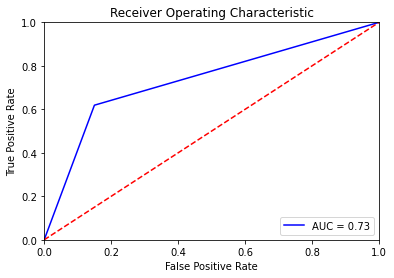

(160, 23) (160,) (41, 23) (41,)
[0.04934738]
[[-0.28517192  0.23902401 -0.41369832  0.18419794 -0.24953497  0.1976689
   0.25038331  0.04576765 -0.25339454  0.05670717  0.82371475 -0.20064522
   0.30431595 -0.33087845  0.26679235  0.22862091 -0.13335156  0.62260511
  -0.04350633 -0.01030882  0.11066983  0.03167141 -0.54014021]]
[[14  6]
 [ 7 14]]
tn: 14, fp:6, fn:7, tp:14
Accuracy: 0.6829268292682927
              precision    recall  f1-score   support

Non-diabetic       0.67      0.70      0.68        20
    Diabetic       0.70      0.67      0.68        21

    accuracy                           0.68        41
   macro avg       0.68      0.68      0.68        41
weighted avg       0.68      0.68      0.68        41

Sensibilidad: 0.6666666666666666


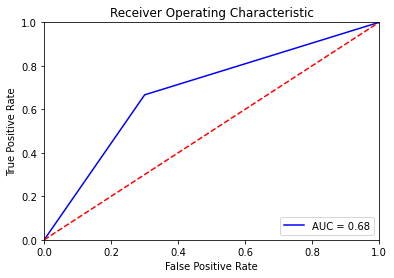

(160, 23) (160,) (41, 23) (41,)
[0.02869614]
[[-0.07119408  0.19326945 -0.36770237  0.39749458 -0.13645522  0.02662385
   0.05946303 -0.00311568 -0.26783703  0.11869911  0.47173339 -0.12383772
  -0.04332578 -0.14086377  0.2283504   0.15670582  0.26917384  0.51083949
   0.13074044  0.06786897  0.1493692  -0.08872439 -0.57912687]]
[[15  5]
 [ 7 14]]
tn: 15, fp:5, fn:7, tp:14
Accuracy: 0.7073170731707317
              precision    recall  f1-score   support

Non-diabetic       0.68      0.75      0.71        20
    Diabetic       0.74      0.67      0.70        21

    accuracy                           0.71        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.71      0.71      0.71        41

Sensibilidad: 0.6666666666666666


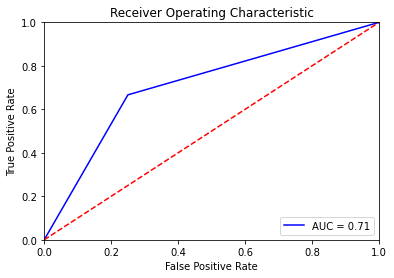

(160, 23) (160,) (41, 23) (41,)
[0.04904071]
[[ 0.00572144  0.21021086 -0.1616618   0.32257234 -0.22631864  0.3147391
  -0.1476708   0.01961761 -0.34701349  0.07418072  0.61269699 -0.16440511
   0.14468235 -0.3302719   0.15437107  0.20659965  0.05754883  0.65075332
   0.10650789  0.22157114  0.24174382 -0.22943828 -0.61201498]]
[[12  8]
 [ 8 13]]
tn: 12, fp:8, fn:8, tp:13
Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

Non-diabetic       0.60      0.60      0.60        20
    Diabetic       0.62      0.62      0.62        21

    accuracy                           0.61        41
   macro avg       0.61      0.61      0.61        41
weighted avg       0.61      0.61      0.61        41

Sensibilidad: 0.6190476190476191


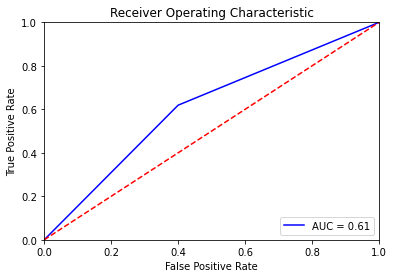

(160, 23) (160,) (41, 23) (41,)
[0.07312282]
[[-0.30262467  0.12961717 -0.12745007  0.24834013 -0.22758855  0.23395967
   0.14178895 -0.07894724 -0.39086953  0.10502761  0.75015693 -0.06660422
  -0.20539767 -0.13966409  0.31194747  0.29577883  0.10225218  0.54643293
  -0.0882226   0.14456125 -0.04694059  0.14308386 -0.56122761]]
[[ 9 11]
 [ 8 13]]
tn: 9, fp:11, fn:8, tp:13
Accuracy: 0.5365853658536586
              precision    recall  f1-score   support

Non-diabetic       0.53      0.45      0.49        20
    Diabetic       0.54      0.62      0.58        21

    accuracy                           0.54        41
   macro avg       0.54      0.53      0.53        41
weighted avg       0.54      0.54      0.53        41

Sensibilidad: 0.6190476190476191


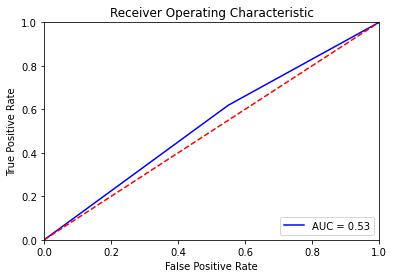

[0.7317073170731707, 0.6829268292682927, 0.7073170731707317, 0.6097560975609756, 0.5365853658536586] [0.6190476190476191, 0.6666666666666666, 0.6666666666666666, 0.6190476190476191, 0.6190476190476191] [0.7345238095238096, 0.6833333333333332, 0.7083333333333334, 0.6095238095238096, 0.5345238095238095]


In [33]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = regr_Logistica(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [34]:
import statistics
media_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_logarit = statistics.stdev(accuracy) # 5.164...


#model.append("Regr_Log")
#mean.append(media_logarit)
#std.append(desviacion_estandar_logarit)

# Regresión Logística Lasso

In [35]:
def reg_Lasso(X_train, X_test, Y_train, Y_test):
              

    scaler = preprocessing.StandardScaler() #normalizamos
    scalerfit =  scaler.fit(X_train) #fit con los datos de train
    X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 
              
    from sklearn.linear_model import Lasso

    lasso = Lasso()

    logreg=LogisticRegression(solver='liblinear', penalty='l1')
    # Valores de alpha
    parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

    # Grid search para lasso regression
    lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

    # Entrenamos
    lasso_train=lasso_regression.fit(X_train_norm, Y_train)

    print(lasso_regression.best_params_)
    print(lasso_regression.best_score_)

    # Obtenemos la salida predicha
    y_pred_lasso = lasso_regression.predict(X_test_norm)
#  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lasso)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lasso)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lasso, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lasso)
    print(f'Sensibilidad: {Sensibilidad}')
    #accuracy.append(Accuracy)
    #sensibilidad.append(Sensibilidad)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    Especificidad = tn / (tn + fp)

    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 23) (160,) (41, 23) (41,)
{'C': 1}
0.6375
[[17  3]
 [ 8 13]]
tn: 17, fp:3, fn:8, tp:13
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

Non-diabetic       0.68      0.85      0.76        20
    Diabetic       0.81      0.62      0.70        21

    accuracy                           0.73        41
   macro avg       0.75      0.73      0.73        41
weighted avg       0.75      0.73      0.73        41

Sensibilidad: 0.6190476190476191


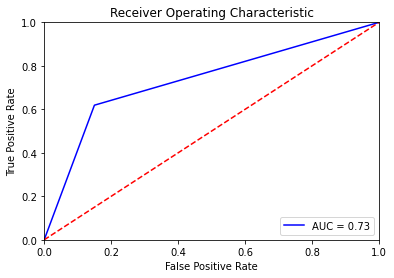

(160, 23) (160,) (41, 23) (41,)
{'C': 1}
0.625
[[13  7]
 [ 7 14]]
tn: 13, fp:7, fn:7, tp:14
Accuracy: 0.6585365853658537
              precision    recall  f1-score   support

Non-diabetic       0.65      0.65      0.65        20
    Diabetic       0.67      0.67      0.67        21

    accuracy                           0.66        41
   macro avg       0.66      0.66      0.66        41
weighted avg       0.66      0.66      0.66        41

Sensibilidad: 0.6666666666666666


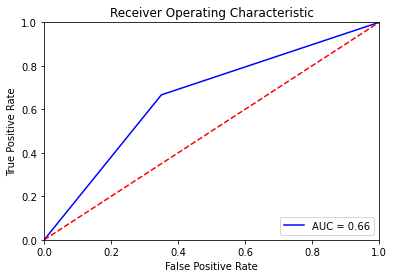

(160, 23) (160,) (41, 23) (41,)
{'C': 5}
0.61875
[[15  5]
 [ 7 14]]
tn: 15, fp:5, fn:7, tp:14
Accuracy: 0.7073170731707317
              precision    recall  f1-score   support

Non-diabetic       0.68      0.75      0.71        20
    Diabetic       0.74      0.67      0.70        21

    accuracy                           0.71        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.71      0.71      0.71        41

Sensibilidad: 0.6666666666666666


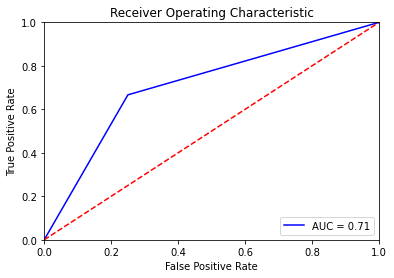

(160, 23) (160,) (41, 23) (41,)
{'C': 5}
0.625
[[11  9]
 [ 8 13]]
tn: 11, fp:9, fn:8, tp:13
Accuracy: 0.5853658536585366
              precision    recall  f1-score   support

Non-diabetic       0.58      0.55      0.56        20
    Diabetic       0.59      0.62      0.60        21

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.58        41

Sensibilidad: 0.6190476190476191


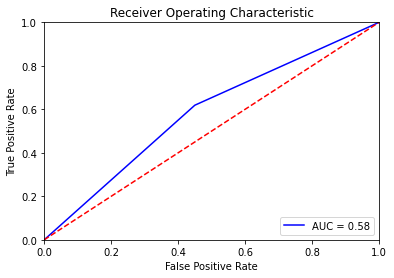

(160, 23) (160,) (41, 23) (41,)
{'C': 1}
0.6375
[[ 9 11]
 [ 7 14]]
tn: 9, fp:11, fn:7, tp:14
Accuracy: 0.5609756097560976
              precision    recall  f1-score   support

Non-diabetic       0.56      0.45      0.50        20
    Diabetic       0.56      0.67      0.61        21

    accuracy                           0.56        41
   macro avg       0.56      0.56      0.55        41
weighted avg       0.56      0.56      0.56        41

Sensibilidad: 0.6666666666666666


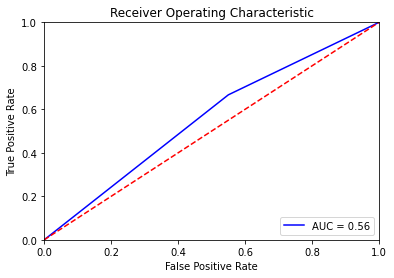

[0.6190476190476191, 0.6666666666666666, 0.6666666666666666, 0.6190476190476191, 0.6666666666666666] [0.7317073170731707, 0.6585365853658537, 0.7073170731707317, 0.5853658536585366, 0.5609756097560976] [0.7345238095238096, 0.6583333333333333, 0.7083333333333334, 0.5845238095238096, 0.5583333333333333]


In [36]:

list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
especificidad = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [37]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model.append("LASSO")
mean.append(media_lasso)
std.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2.append("LASSO")
mean2.append(media_lasso2)
std2.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.6487804878048781 0.07438024722915562
0.6488095238095238 0.07632057345154576
0.6476190476190476 0.026082026547865022
0.65 0.15811388300841894


In [38]:
def plot_mean_std_metric(df_metrics, lims, metric_name=' ', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()


In [39]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model
df_metrics["mean"] = mean
df_metrics["std"] = std

In [40]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)
plt.savefig("{}.pdf")
plt.close()




In [41]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2
df_metrics2["mean"] = mean2
df_metrics2["std"] = std2

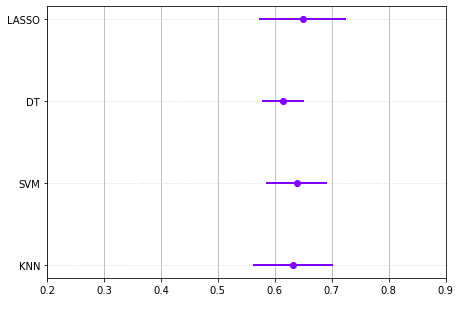

In [42]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)

# Feature Selection

# Feature Selection ExtraTreesClassifier

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

def extraTree(X_train, X_test, Y_train, Y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    # Como en árboles, no es necesario que las características estén normalizadas
    # Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Muestra el ranking en el ordenamiento
    print("Ranking de Características:")

    for f in range(X_train.shape[1]):
        print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Importancia de las características")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    return indices[0:5]

(160, 23) (160,) (41, 23) (41,)
Ranking de Características:
1. Característica 10 (0.079084)
2. Característica 1 (0.062987)
3. Característica 17 (0.059544)
4. Característica 18 (0.054033)
5. Característica 5 (0.051900)
6. Característica 2 (0.046785)
7. Característica 16 (0.046686)
8. Característica 21 (0.044317)
9. Característica 4 (0.044208)
10. Característica 22 (0.044088)
11. Característica 14 (0.044052)
12. Característica 9 (0.043648)
13. Característica 8 (0.041669)
14. Característica 12 (0.039988)
15. Característica 0 (0.039372)
16. Característica 11 (0.037993)
17. Característica 19 (0.037520)
18. Característica 3 (0.036308)
19. Característica 6 (0.033372)
20. Característica 20 (0.030665)
21. Característica 13 (0.030310)
22. Característica 15 (0.029357)
23. Característica 7 (0.022113)


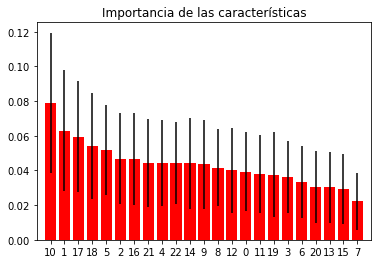

(160, 23) (160,) (41, 23) (41,)
Ranking de Características:
1. Característica 10 (0.083367)
2. Característica 17 (0.062150)
3. Característica 4 (0.054361)
4. Característica 18 (0.052730)
5. Característica 14 (0.049458)
6. Característica 8 (0.048782)
7. Característica 19 (0.048041)
8. Característica 2 (0.047923)
9. Característica 5 (0.046715)
10. Característica 11 (0.045913)
11. Característica 16 (0.045029)
12. Característica 1 (0.043926)
13. Característica 9 (0.040931)
14. Característica 12 (0.040467)
15. Característica 6 (0.039223)
16. Característica 22 (0.038263)
17. Característica 0 (0.038132)
18. Característica 21 (0.034241)
19. Característica 15 (0.033772)
20. Característica 3 (0.030604)
21. Característica 20 (0.029641)
22. Característica 13 (0.027591)
23. Característica 7 (0.018742)


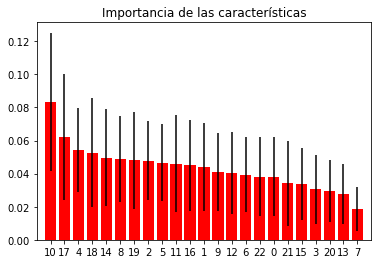

(160, 23) (160,) (41, 23) (41,)
Ranking de Características:
1. Característica 10 (0.072557)
2. Característica 17 (0.060957)
3. Característica 16 (0.055819)
4. Característica 4 (0.052148)
5. Característica 14 (0.049466)
6. Característica 1 (0.049037)
7. Característica 5 (0.048260)
8. Característica 18 (0.047097)
9. Característica 9 (0.045949)
10. Característica 0 (0.044177)
11. Característica 11 (0.043807)
12. Característica 2 (0.042450)
13. Característica 21 (0.041984)
14. Característica 8 (0.040795)
15. Característica 22 (0.040231)
16. Característica 3 (0.038547)
17. Característica 19 (0.038353)
18. Característica 6 (0.036156)
19. Característica 15 (0.035230)
20. Característica 20 (0.035006)
21. Característica 12 (0.031018)
22. Característica 13 (0.028370)
23. Característica 7 (0.022586)


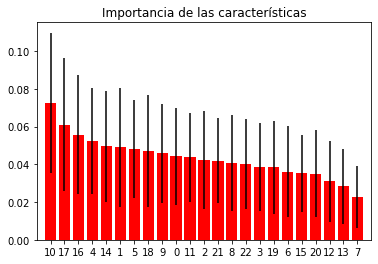

(160, 23) (160,) (41, 23) (41,)
Ranking de Características:
1. Característica 17 (0.073442)
2. Característica 10 (0.072796)
3. Característica 1 (0.057114)
4. Característica 14 (0.052944)
5. Característica 5 (0.050805)
6. Característica 4 (0.048369)
7. Característica 18 (0.047485)
8. Característica 8 (0.045971)
9. Característica 9 (0.044086)
10. Característica 22 (0.043668)
11. Característica 16 (0.042643)
12. Característica 3 (0.041941)
13. Característica 11 (0.041649)
14. Característica 19 (0.040650)
15. Característica 2 (0.039590)
16. Característica 0 (0.038239)
17. Característica 21 (0.036266)
18. Característica 6 (0.035000)
19. Característica 15 (0.033272)
20. Característica 20 (0.032307)
21. Característica 13 (0.030326)
22. Característica 12 (0.028679)
23. Característica 7 (0.022757)


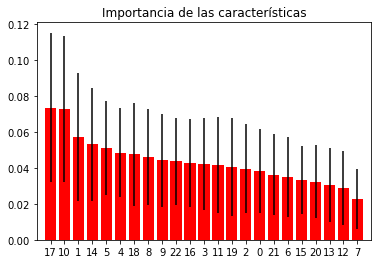

(160, 23) (160,) (41, 23) (41,)
Ranking de Características:
1. Característica 10 (0.085402)
2. Característica 17 (0.065748)
3. Característica 14 (0.054743)
4. Característica 16 (0.050799)
5. Característica 1 (0.050225)
6. Característica 18 (0.050194)
7. Característica 4 (0.048153)
8. Característica 8 (0.046418)
9. Característica 19 (0.045365)
10. Característica 5 (0.044289)
11. Característica 22 (0.043976)
12. Característica 11 (0.043139)
13. Característica 9 (0.040778)
14. Característica 2 (0.040265)
15. Característica 21 (0.038377)
16. Característica 0 (0.035634)
17. Característica 6 (0.035357)
18. Característica 15 (0.034355)
19. Característica 3 (0.033859)
20. Característica 12 (0.031779)
21. Característica 13 (0.030396)
22. Característica 20 (0.030395)
23. Característica 7 (0.020353)


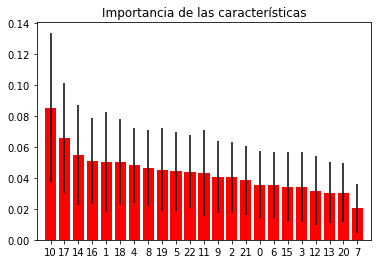

[array([10,  1, 17, 18,  5], dtype=int64), array([10, 17,  4, 18, 14], dtype=int64), array([10, 17, 16,  4, 14], dtype=int64), array([17, 10,  1, 14,  5], dtype=int64), array([10, 17, 14, 16,  1], dtype=int64)]


In [44]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = extraTree(X_train, X_test, Y_train, Y_test)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

#  Selección de características Mutual Information

In [47]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Scikit-learn proporciona la clase SelectKBest, que al usarse en combinación con distintos tests estadísticos, permite seleccionar una serie de características

def chisquare(X_train, X_test, Y_train, Y_test, data_input_new):
    # como tenemos 9 características, evaluamos el estadístico chi2 para las 9, y posteriormente ordenamos los valores
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
    fit = bestfeatures.fit(data_input_new, data_output)
    print(fit.scores_)

    names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',"f12" 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', "23"]
    data_input_new2 = pd.DataFrame(data_input_new, columns = names)

    for element,name in zip(data_input_new.columns, names):
        print(name,element)

    array = data_input_new.values
    data_input_array = array [:,0:27]
    print(data_input_array.shape)

    pd_extendido = pd.DataFrame(data_input_array, columns=names)

    df = pd.DataFrame({'Nombre_feat':pd_extendido.columns, 'valores':fit.scores_})
    df_ordenado = df.sort_values('valores', ascending=False)
    ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
    plt.title("Ordenamiento de características con el estadístico chi cuadrado y las características originales")


(160, 23) (160,) (41, 23) (41,)
[0.07621134 0.04402295 0.         0.02232842 0.04635671 0.00301414
 0.         0.         0.         0.03972296 0.085963   0.018019
 0.05176502 0.         0.10516923 0.         0.01603794 0.05299628
 0.05747553 0.05722382 0.00594908 0.03795995 0.01794076]
f0 LgSnackBed
f1 AvoidAloneLowBG
f2 TestBGRunHigh
f3 HighBGAlone
f4 EatFirstSignLowBG
f5 RedInsThinkLowBG
f6 KeepHighBGMtg
f7 CarryFastActSug
f8 AvoidExThinkLowBG
f9 CkSugOftMtg
f10 WorryNotRecLowBG
f11 WorryNoFood
f12f13 WorryPassOut
f14 WorryEmbarSocial
f15 WorryReacAlone
f16 WorryAppStupDrunk
f17 WorryLoseCntrl
f18 WorryNoHelp
f19 WorryReactDrive
f20 WorryMistAcc
f21 WorryBadEvalCrit
f22 WorryRespForOthers
23 WorryDizzy
(201, 23)
(160, 23) (160,) (41, 23) (41,)
[0.         0.08720335 0.         0.00474139 0.         0.
 0.01827506 0.         0.0130779  0.         0.09465983 0.
 0.01342702 0.03305733 0.084115   0.         0.         0.09477686
 0.0583599  0.         0.         0.         0.        ]
f

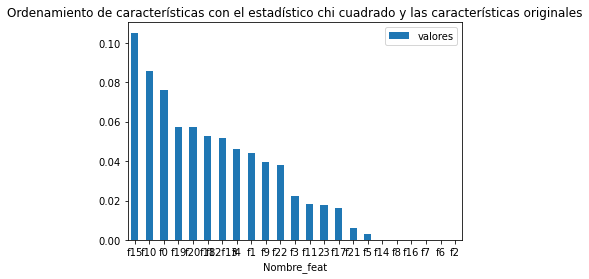

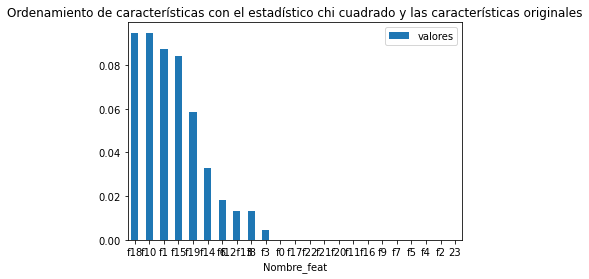

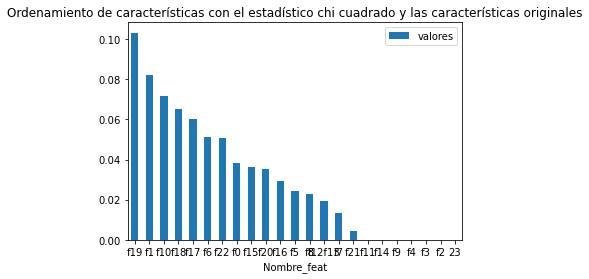

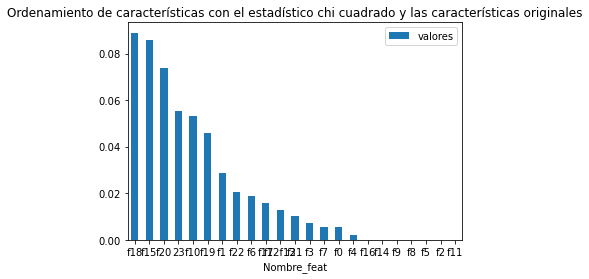

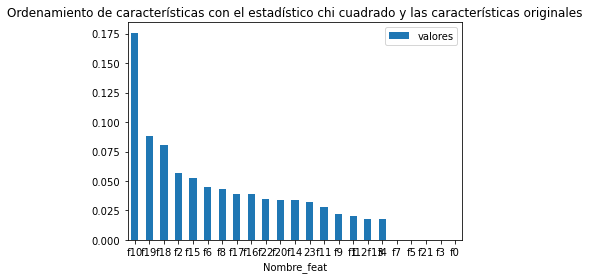

In [48]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = chisquare(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

## Selección de características. Métodos embedded

In [49]:
from matplotlib import pyplot
def embedded(X_train, X_test, Y_train, Y_test, data_input_new):
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,6)}
    profundidad_grid = np.array(range(1,6))


    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    grid_arbol_clasif.get_params()

    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
    importance_arbol = modelo_arbol_clasif.feature_importances_
    pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
    pyplot.show()

    # 5. Se representa gráficamente el modelo de clasificación
    from sklearn.tree import export_graphviz
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from IPython.display import Image  
    import pydotplus

    dot_data = StringIO()
    export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = data_input_new.columns[0:],class_names=['y-diab','n-diab'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('Tree_Clasif_all.png')
    Image(graph.create_png())

(160, 23) (160,) (41, 23) (41,)
{'max_depth': 2}


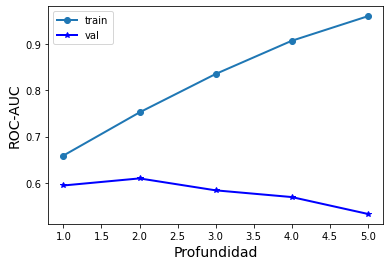

Mejor ROC-AUC en validación cruzada: 0.610
Mejor valor del hiperparámetro: {'max_depth': 2}


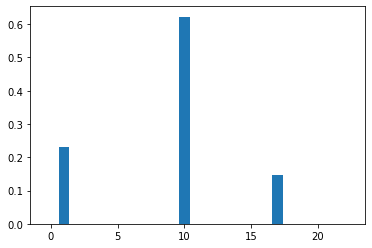

(160, 23) (160,) (41, 23) (41,)
{'max_depth': 2}


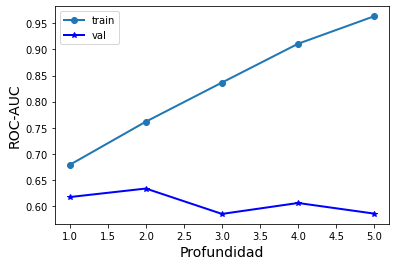

Mejor ROC-AUC en validación cruzada: 0.633
Mejor valor del hiperparámetro: {'max_depth': 2}


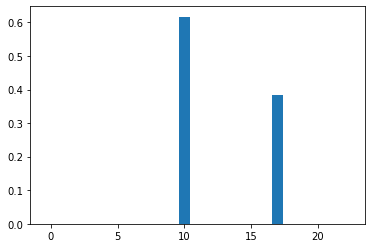

(160, 23) (160,) (41, 23) (41,)
{'max_depth': 3}


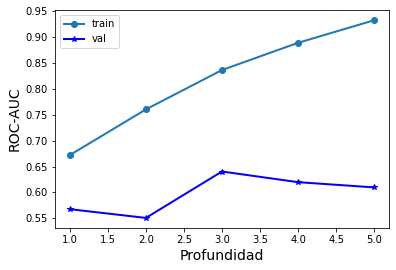

Mejor ROC-AUC en validación cruzada: 0.640
Mejor valor del hiperparámetro: {'max_depth': 3}


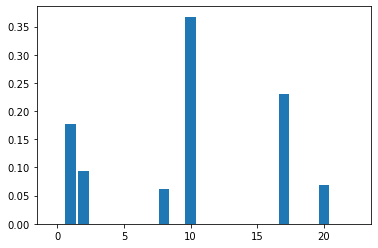

(160, 23) (160,) (41, 23) (41,)
{'max_depth': 3}


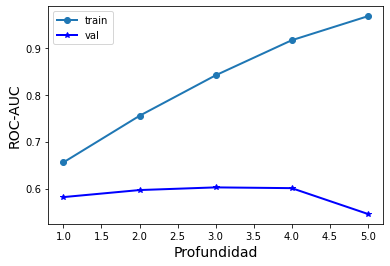

Mejor ROC-AUC en validación cruzada: 0.602
Mejor valor del hiperparámetro: {'max_depth': 3}


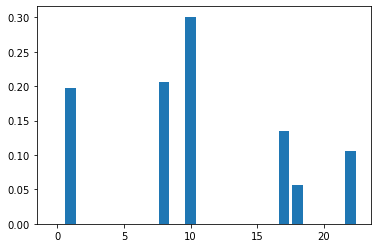

(160, 23) (160,) (41, 23) (41,)
{'max_depth': 2}


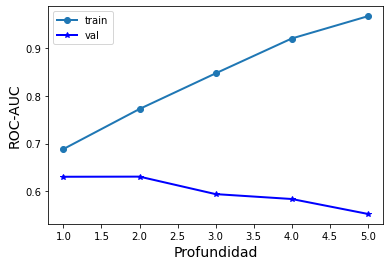

Mejor ROC-AUC en validación cruzada: 0.630
Mejor valor del hiperparámetro: {'max_depth': 2}


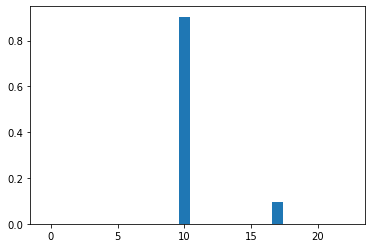

[None, None, None, None, None]


In [50]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = embedded(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

In [51]:
names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',"f12" 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',"f22" 'f23', 'f24', 'f25', 'f26']
data_input_new2 = pd.DataFrame(data_input, columns = names)

for element,name in zip(data_input.columns, names):
    print(name,element)

f0 LgSnackBed
f1 AvoidAloneLowBG
f2 TestBGRunHigh
f3 HighBGAlone
f4 EatFirstSignLowBG
f5 RedInsThinkLowBG
f6 KeepHighBGMtg
f7 CarryFastActSug
f8 AvoidExThinkLowBG
f9 CkSugOftMtg
f10 WorryNotRecLowBG
f11 WorryNoFood
f12f13 WorryPassOut
f14 WorryEmbarSocial
f15 WorryReacAlone
f16 WorryAppStupDrunk
f17 WorryLoseCntrl
f18 WorryNoHelp
f19 WorryReactDrive
f20 WorryMistAcc
f21 WorryBadEvalCrit
f22f23 WorryRespForOthers
f24 WorryDizzy


## Boostrap


In [52]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [53]:
df_data = data1.rename(columns = {"BCaseControlStatus":"label"})
df_data.head()

,label,HypoFearSurvCompDaysFromEnroll,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,KeepHighBGMtg,CarryFastActSug,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,Case,0.0,2.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,Control,0.0,2.0,0.0,4.0,1.0,4.0,4.0,1.0,3.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,Case,0.0,0.0,0.0,2.0,0.0,4.0,3.0,1.0,3.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Control,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,Case,11.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


In [54]:
data_new2 = df_data.replace("Case",1).replace("Control",0)

In [55]:
data_new2.head()

,label,HypoFearSurvCompDaysFromEnroll,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,KeepHighBGMtg,CarryFastActSug,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,1,0.0,2.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,0,0.0,2.0,0.0,4.0,1.0,4.0,4.0,1.0,3.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,1,0.0,0.0,0.0,2.0,0.0,4.0,3.0,1.0,3.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,1,11.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


In [56]:
compute_boostrap(data_new2, data_input.columns, 'label', 'importance_bootstrap', flag_save_importance=True)

sample size:  160
     LgSnackBed  label
97          0.0      1
117         0.0      1
59          3.0      1
35          0.0      1
165         1.0      1
..          ...    ...
24          1.0      1
3           0.0      0
170         2.0      1
49          0.0      1
149         1.0      0

[160 rows x 2 columns]
     LgSnackBed  label
175         2.0      0
33          1.0      1
200         0.0      0
187         0.0      0
22          2.0      0
..          ...    ...
185         1.0      0
168         0.0      1
7           1.0      1
142         1.0      1
44          3.0      0

[160 rows x 2 columns]
     LgSnackBed  label
117         0.0      1
9           0.0      1
17          1.0      0
20          0.0      0
125         1.0      1
..          ...    ...
156         1.0      0
30          3.0      1
76          1.0      1
132         2.0      1
118         1.0      1

[160 rows x 2 columns]
     LgSnackBed  label
68          0.0      0
53          0.0      0
130         2

[160 rows x 2 columns]
sample size:  160
     AvoidAloneLowBG  label
97               3.0      1
117              0.0      1
59               1.0      1
35               3.0      1
165              0.0      1
..               ...    ...
24               0.0      1
3                0.0      0
170              0.0      1
49               0.0      1
149              0.0      0

[160 rows x 2 columns]
     AvoidAloneLowBG  label
175              1.0      0
33               3.0      1
200              0.0      0
187              0.0      0
22               0.0      0
..               ...    ...
185              0.0      0
168              0.0      1
7                4.0      1
142              4.0      1
44               1.0      0

[160 rows x 2 columns]
     AvoidAloneLowBG  label
117              0.0      1
9                4.0      1
17               0.0      0
20               4.0      0
125              1.0      1
..               ...    ...
156              0.0      0
30             

[160 rows x 2 columns]
     AvoidAloneLowBG  label
110              0.0      0
49               0.0      1
3                0.0      0
67               0.0      0
135              1.0      0
..               ...    ...
185              0.0      0
80               1.0      1
88               1.0      1
152              0.0      0
193              0.0      1

[160 rows x 2 columns]
     AvoidAloneLowBG  label
175              1.0      0
50               0.0      0
173              0.0      0
26               0.0      0
3                0.0      0
..               ...    ...
136              0.0      0
49               0.0      1
183              0.0      1
21               0.0      0
10               0.0      0

[160 rows x 2 columns]
     AvoidAloneLowBG  label
121              0.0      0
103              4.0      0
198              0.0      0
195              0.0      0
67               0.0      0
..               ...    ...
60               2.0      0
77               2.0      1
136  

[160 rows x 2 columns]
     HighBGAlone  label
39           2.0      0
34           1.0      1
61           4.0      0
54           0.0      1
74           2.0      1
..           ...    ...
73           0.0      1
38           0.0      1
103          0.0      0
170          1.0      1
7            0.0      1

[160 rows x 2 columns]
     HighBGAlone  label
23           0.0      1
164          1.0      1
11           0.0      0
176          2.0      0
35           4.0      1
..           ...    ...
94           4.0      1
134          0.0      1
179          4.0      1
159          0.0      0
123          3.0      1

[160 rows x 2 columns]
     HighBGAlone  label
117          0.0      1
134          0.0      1
147          0.0      0
143          0.0      0
89           0.0      1
..           ...    ...
192          0.0      1
140          0.0      0
129          0.0      0
63           3.0      1
135          1.0      0

[160 rows x 2 columns]
     HighBGAlone  label
156          0.0 

     EatFirstSignLowBG  label
43                 3.0      0
136                4.0      0
189                3.0      0
112                3.0      1
139                1.0      1
..                 ...    ...
200                3.0      0
198                1.0      0
159                4.0      0
102                4.0      0
168                0.0      1

[160 rows x 2 columns]
     EatFirstSignLowBG  label
110                0.0      0
49                 0.0      1
3                  4.0      0
67                 4.0      0
135                1.0      0
..                 ...    ...
185                4.0      0
80                 3.0      1
88                 2.0      1
152                0.0      0
193                3.0      1

[160 rows x 2 columns]
     EatFirstSignLowBG  label
175                4.0      0
50                 2.0      0
173                2.0      0
26                 3.0      0
3                  4.0      0
..                 ...    ...
136                4.0

[160 rows x 2 columns]
     RedInsThinkLowBG  label
83                3.0      0
49                0.0      1
141               3.0      1
5                 3.0      0
150               2.0      1
..                ...    ...
96                0.0      0
3                 4.0      0
90                4.0      0
87                0.0      0
16                4.0      0

[160 rows x 2 columns]
     RedInsThinkLowBG  label
20                0.0      0
12                2.0      0
101               4.0      1
194               0.0      0
34                4.0      1
..                ...    ...
98                2.0      0
128               3.0      0
115               1.0      0
109               1.0      0
160               3.0      1

[160 rows x 2 columns]
     RedInsThinkLowBG  label
129               1.0      0
172               3.0      1
25                0.0      0
123               3.0      1
36                1.0      0
..                ...    ...
77                2.0      1
1

[160 rows x 2 columns]
     CarryFastActSug  label
139              3.0      1
123              4.0      1
28               4.0      0
133              1.0      0
136              4.0      0
..               ...    ...
96               4.0      0
88               1.0      1
23               4.0      1
163              3.0      1
63               4.0      1

[160 rows x 2 columns]
     CarryFastActSug  label
171              4.0      1
88               1.0      1
103              4.0      0
182              4.0      0
73               4.0      1
..               ...    ...
126              4.0      0
167              3.0      0
9                4.0      1
92               4.0      0
29               4.0      0

[160 rows x 2 columns]
     CarryFastActSug  label
23               4.0      1
96               4.0      0
52               4.0      1
147              4.0      0
168              4.0      1
..               ...    ...
10               4.0      0
118              4.0      1
58   

[160 rows x 2 columns]
     AvoidExThinkLowBG  label
117                0.0      1
9                  4.0      1
17                 3.0      0
20                 2.0      0
125                2.0      1
..                 ...    ...
156                0.0      0
30                 2.0      1
76                 1.0      1
132                2.0      1
118                2.0      1

[160 rows x 2 columns]
     AvoidExThinkLowBG  label
68                 3.0      0
53                 0.0      0
130                2.0      1
105                3.0      1
36                 3.0      0
..                 ...    ...
11                 4.0      0
179                4.0      1
189                1.0      0
119                1.0      1
24                 1.0      1

[160 rows x 2 columns]
     AvoidExThinkLowBG  label
96                 4.0      0
63                 4.0      1
169                1.0      0
197                1.0      0
68                 3.0      0
..                 ...    ...

[160 rows x 2 columns]
     AvoidExThinkLowBG  label
175                4.0      0
50                 2.0      0
173                1.0      0
26                 2.0      0
3                  2.0      0
..                 ...    ...
136                2.0      0
49                 1.0      1
183                0.0      1
21                 3.0      0
10                 4.0      0

[160 rows x 2 columns]
     AvoidExThinkLowBG  label
121                0.0      0
103                4.0      0
198                1.0      0
195                4.0      0
67                 2.0      0
..                 ...    ...
60                 4.0      0
77                 2.0      1
136                2.0      0
177                4.0      0
168                1.0      1

[160 rows x 2 columns]
     AvoidExThinkLowBG  label
96                 4.0      0
133                3.0      0
107                2.0      0
177                4.0      0
84                 1.0      0
..                 ...    ...

[160 rows x 2 columns]
     WorryNotRecLowBG  label
23                4.0      1
164               2.0      1
11                0.0      0
176               2.0      0
35                4.0      1
..                ...    ...
94                2.0      1
134               1.0      1
179               3.0      1
159               2.0      0
123               3.0      1

[160 rows x 2 columns]
     WorryNotRecLowBG  label
117               0.0      1
134               1.0      1
147               2.0      0
143               2.0      0
89                0.0      1
..                ...    ...
192               2.0      1
140               1.0      0
129               3.0      0
63                3.0      1
135               3.0      0

[160 rows x 2 columns]
     WorryNotRecLowBG  label
156               1.0      0
187               0.0      0
23                4.0      1
193               1.0      1
36                1.0      0
..                ...    ...
15                1.0      0
1

     WorryNoFood  label
68           2.0      0
57           0.0      1
14           3.0      0
156          0.0      0
151          2.0      1
..           ...    ...
149          3.0      0
78           2.0      1
153          0.0      0
30           3.0      1
67           2.0      0

[160 rows x 2 columns]
sample size:  160
     WorryPassOut  label
97            0.0      1
117           0.0      1
59            1.0      1
35            0.0      1
165           4.0      1
..            ...    ...
24            1.0      1
3             3.0      0
170           0.0      1
49            0.0      1
149           0.0      0

[160 rows x 2 columns]
     WorryPassOut  label
175           1.0      0
33            1.0      1
200           1.0      0
187           0.0      0
22            4.0      0
..            ...    ...
185           0.0      0
168           2.0      1
7             4.0      1
142           1.0      1
44            0.0      0

[160 rows x 2 columns]
     WorryPassOut  lab

[160 rows x 2 columns]
     WorryEmbarSocial  label
179               0.0      1
49                0.0      1
194               0.0      0
139               0.0      1
74                0.0      1
..                ...    ...
62                3.0      1
109               1.0      0
95                0.0      0
116               3.0      1
6                 0.0      0

[160 rows x 2 columns]
     WorryEmbarSocial  label
83                0.0      0
49                0.0      1
141               0.0      1
5                 0.0      0
150               1.0      1
..                ...    ...
96                0.0      0
3                 2.0      0
90                1.0      0
87                0.0      0
16                0.0      0

[160 rows x 2 columns]
     WorryEmbarSocial  label
20                0.0      0
12                1.0      0
101               1.0      1
194               0.0      0
34                0.0      1
..                ...    ...
98                1.0      0
1

[160 rows x 2 columns]
     WorryReacAlone  label
76              3.0      1
7               4.0      1
94              2.0      1
188             1.0      1
118             3.0      1
..              ...    ...
93              0.0      1
121             0.0      0
10              0.0      0
127             3.0      1
87              1.0      0

[160 rows x 2 columns]
     WorryReacAlone  label
55              2.0      0
97              2.0      1
101             0.0      1
180             2.0      0
133             2.0      0
..              ...    ...
69              1.0      0
35              1.0      1
103             0.0      0
88              2.0      1
33              3.0      1

[160 rows x 2 columns]
     WorryReacAlone  label
120             0.0      1
91              3.0      1
102             0.0      0
83              2.0      0
30              1.0      1
..              ...    ...
18              1.0      0
181             2.0      0
64              2.0      1
133        

[160 rows x 2 columns]
     WorryAppStupDrunk  label
156                0.0      0
187                0.0      0
23                 4.0      1
193                1.0      1
36                 3.0      0
..                 ...    ...
15                 3.0      0
14                 1.0      0
37                 4.0      1
143                0.0      0
83                 0.0      0

[160 rows x 2 columns]
     WorryAppStupDrunk  label
101                0.0      1
127                0.0      1
36                 3.0      0
79                 0.0      1
169                0.0      0
..                 ...    ...
82                 2.0      1
124                1.0      1
64                 2.0      1
128                0.0      0
86                 1.0      1

[160 rows x 2 columns]
     WorryAppStupDrunk  label
76                 2.0      1
7                  4.0      1
94                 3.0      1
188                0.0      1
118                2.0      1
..                 ...    ...

     WorryLoseCntrl  label
104             3.0      0
126             1.0      0
96              2.0      0
101             2.0      1
130             1.0      1
..              ...    ...
35              0.0      1
52              2.0      1
39              0.0      0
167             0.0      0
112             0.0      1

[160 rows x 2 columns]
     WorryLoseCntrl  label
139             1.0      1
123             2.0      1
28              2.0      0
133             1.0      0
136             1.0      0
..              ...    ...
96              2.0      0
88              2.0      1
23              2.0      1
163             1.0      1
63              3.0      1

[160 rows x 2 columns]
     WorryLoseCntrl  label
171             3.0      1
88              2.0      1
103             1.0      0
182             0.0      0
73              1.0      1
..              ...    ...
126             1.0      0
167             0.0      0
9               2.0      1
92              0.0      0
29     

[160 rows x 2 columns]
     WorryNoHelp  label
68           0.0      0
53           0.0      0
130          1.0      1
105          2.0      1
36           1.0      0
..           ...    ...
11           0.0      0
179          4.0      1
189          1.0      0
119          1.0      1
24           2.0      1

[160 rows x 2 columns]
     WorryNoHelp  label
96           1.0      0
63           1.0      1
169          0.0      0
197          0.0      0
68           0.0      0
..           ...    ...
111          2.0      1
95           1.0      0
21           1.0      0
31           3.0      1
94           3.0      1

[160 rows x 2 columns]
     WorryNoHelp  label
68           0.0      0
121          0.0      0
90           1.0      0
7            4.0      1
120          0.0      1
..           ...    ...
141          1.0      1
38           2.0      1
136          1.0      0
109          1.0      0
117          0.0      1

[160 rows x 2 columns]
     WorryNoHelp  label
104          2.0 

     WorryReactDrive  label
129              4.0      0
172              2.0      1
25               1.0      0
123              2.0      1
36               1.0      0
..               ...    ...
77               1.0      1
130              1.0      1
52               3.0      1
88               3.0      1
154              2.0      1

[160 rows x 2 columns]
     WorryReactDrive  label
43               1.0      0
136              2.0      0
189              2.0      0
112              4.0      1
139              3.0      1
..               ...    ...
200              2.0      0
198              0.0      0
159              1.0      0
102              0.0      0
168              4.0      1

[160 rows x 2 columns]
     WorryReactDrive  label
110              1.0      0
49               0.0      1
3                2.0      0
67               1.0      0
135              1.0      0
..               ...    ...
185              0.0      0
80               2.0      1
88               3.0      1


[160 rows x 2 columns]
     WorryMistAcc  label
58            1.0      1
140           0.0      0
111           3.0      1
87            2.0      0
89            0.0      1
..            ...    ...
98            2.0      0
95            1.0      0
152           1.0      0
182           0.0      0
169           0.0      0

[160 rows x 2 columns]
     WorryMistAcc  label
179           0.0      1
49            0.0      1
194           0.0      0
139           2.0      1
74            0.0      1
..            ...    ...
62            2.0      1
109           1.0      0
95            1.0      0
116           4.0      1
6             0.0      0

[160 rows x 2 columns]
     WorryMistAcc  label
83            0.0      0
49            0.0      1
141           1.0      1
5             0.0      0
150           2.0      1
..            ...    ...
96            1.0      0
3             1.0      0
90            2.0      0
87            2.0      0
16            2.0      0

[160 rows x 2 columns]
     

[160 rows x 2 columns]
     WorryRespForOthers  label
171                 2.0      1
88                  3.0      1
103                 0.0      0
182                 0.0      0
73                  1.0      1
..                  ...    ...
126                 1.0      0
167                 0.0      0
9                   2.0      1
92                  0.0      0
29                  0.0      0

[160 rows x 2 columns]
     WorryRespForOthers  label
23                  1.0      1
96                  0.0      0
52                  4.0      1
147                 2.0      0
168                 4.0      1
..                  ...    ...
10                  0.0      0
118                 3.0      1
58                  1.0      1
66                  1.0      0
171                 2.0      1

[160 rows x 2 columns]
     WorryRespForOthers  label
39                  1.0      0
34                  1.0      1
61                  0.0      0
54                  0.0      1
74                  0.0      1

[160 rows x 2 columns]
     WorryDizzy  label
68          0.0      0
53          2.0      0
130         1.0      1
105         2.0      1
36          3.0      0
..          ...    ...
11          2.0      0
179         0.0      1
189         0.0      0
119         0.0      1
24          2.0      1

[160 rows x 2 columns]
     WorryDizzy  label
96          2.0      0
63          2.0      1
169         1.0      0
197         1.0      0
68          0.0      0
..          ...    ...
111         0.0      1
95          1.0      0
21          3.0      0
31          2.0      1
94          4.0      1

[160 rows x 2 columns]
     WorryDizzy  label
68          0.0      0
121         0.0      0
90          2.0      0
7           1.0      1
120         0.0      1
..          ...    ...
141         0.0      1
38          4.0      1
136         1.0      0
109         2.0      0
117         0.0      1

[160 rows x 2 columns]
     WorryDizzy  label
104         4.0      0
126         1.0      0
96      

# Machile Learning con FS

In [60]:
data_input.head()

,LgSnackBed,AvoidAloneLowBG,TestBGRunHigh,HighBGAlone,EatFirstSignLowBG,RedInsThinkLowBG,KeepHighBGMtg,CarryFastActSug,AvoidExThinkLowBG,CkSugOftMtg,...,WorryEmbarSocial,WorryReacAlone,WorryAppStupDrunk,WorryLoseCntrl,WorryNoHelp,WorryReactDrive,WorryMistAcc,WorryBadEvalCrit,WorryRespForOthers,WorryDizzy
0,2.0,4.0,2.0,3.0,2.0,4.0,1.0,4.0,0.0,3.0,...,2.0,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0
1,2.0,0.0,4.0,1.0,4.0,4.0,1.0,3.0,0.0,4.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,2.0,0.0,4.0,3.0,1.0,3.0,0.0,0.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,2.0,4.0,...,2.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0,3.0,2.0
4,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,...,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0


In [62]:
#Combinamos diferentes características para ver su relación con la salida 
# data_input_FS son las características seleccionadas por 3 o más métodos
# data_input_FS2 son las características seleccionadas únicamente por Bootstrap
data_input_FS = data_input[["WorryNoHelp", "WorryLoseCntrl","WorryNotRecLowBG"]]
data_input_FS2 = data_input[["TestBGRunHigh", "HighBGAlone","EatFirstSignLowBG","RedInsThinkLowBG", "AvoidExThinkLowBG", "CkSugOftMtg", "WorryNotRecLowBG", "WorryPassOut", "WorryEmbarSocial", "WorryReacAlone", "WorryAppStupDrunk", "WorryLoseCntrl", "WorryNoHelp", "WorryReactDrive", "WorryMistAcc", "WorryBadEvalCrit", "WorryRespForOthers"]]
       

# KNN

In [63]:
model_FS   =[]
mean_FS = []
std_FS = []

model2_FS   =[]
mean2_FS = []
std2_FS = []

(160, 3) (160,) (41, 3) (41,)


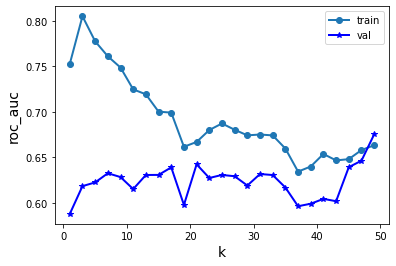

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.675
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.4878048780487805
Sensibilidad y Accuracy 0.047619047619047616 0.4878048780487805


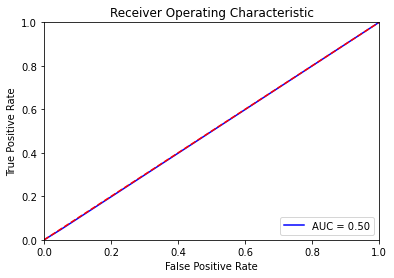

(160, 3) (160,) (41, 3) (41,)


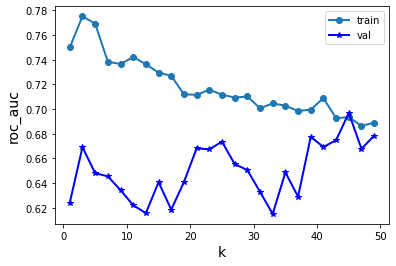

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.697
Valor correspondiente para el hiperparámetro: {'n_neighbors': 45}
0.6829268292682927
Sensibilidad y Accuracy 0.42857142857142855 0.6829268292682927


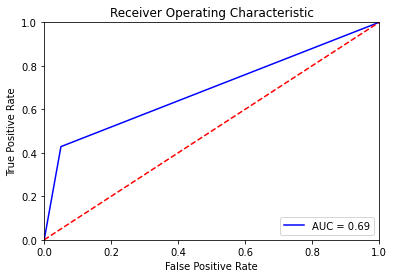

(160, 3) (160,) (41, 3) (41,)


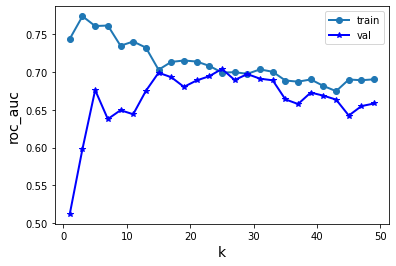

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.704
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.5853658536585366
Sensibilidad y Accuracy 0.47619047619047616 0.5853658536585366


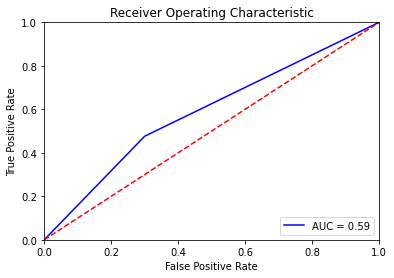

(160, 3) (160,) (41, 3) (41,)


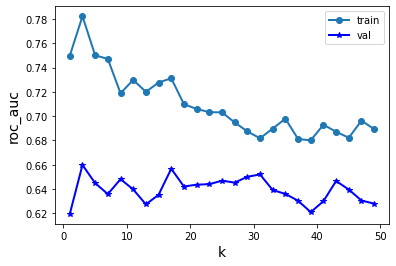

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.660
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.6097560975609756
Sensibilidad y Accuracy 0.47619047619047616 0.6097560975609756


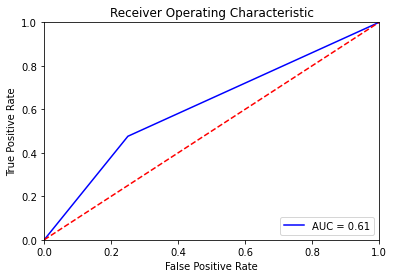

(160, 3) (160,) (41, 3) (41,)


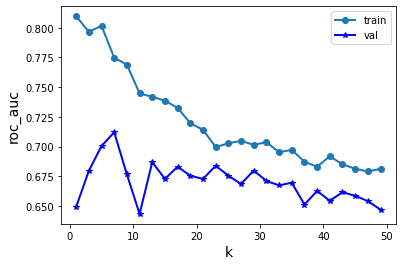

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.712
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}
0.5365853658536586
Sensibilidad y Accuracy 0.5238095238095238 0.5365853658536586


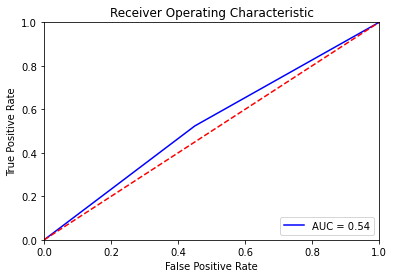

[0.047619047619047616, 0.42857142857142855, 0.47619047619047616, 0.47619047619047616, 0.5238095238095238] [0.4878048780487805, 0.6829268292682927, 0.5853658536585366, 0.6097560975609756, 0.5365853658536586] [0.4988095238095238, 0.6892857142857143, 0.5880952380952381, 0.6130952380952381, 0.5369047619047619]


In [64]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])



print(sensi, accuracy, roc)

In [65]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...


model_FS.append("KNN")
mean_FS.append(media_knn)
std_FS.append(desviacion_estandar_knn)
print(media_knn, desviacion_estandar_knn)



media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2_FS.append("KNN")
mean2_FS.append(media_knn2)
std2_FS.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)

0.5804878048780487 0.07397927262489319
0.5852380952380952 0.0731712029647638


In [66]:
media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.3904761904761905 0.19459825468288144
0.78 0.17175564037317664


# SVC

In [67]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVC
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo')
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)


    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

    Sensibilidad= recall_score(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.729
0.7560975609756098
[[17  3]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.7560975609756098


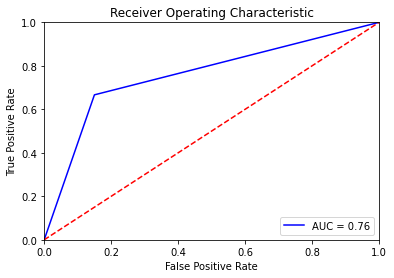

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.745
0.5853658536585366
[[15  5]
 [12  9]]
Sensibilidad y Accuracy 0.42857142857142855 0.5853658536585366


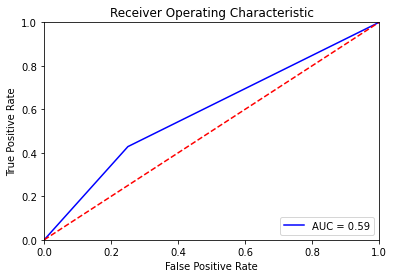

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.738
0.5853658536585366
[[20  0]
 [17  4]]
Sensibilidad y Accuracy 0.19047619047619047 0.5853658536585366


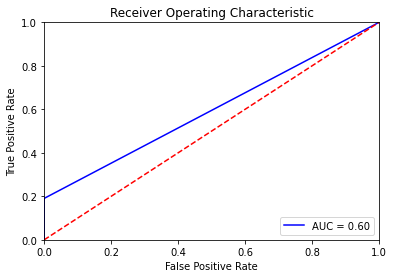

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.743
0.6829268292682927
[[15  5]
 [ 8 13]]
Sensibilidad y Accuracy 0.6190476190476191 0.6829268292682927


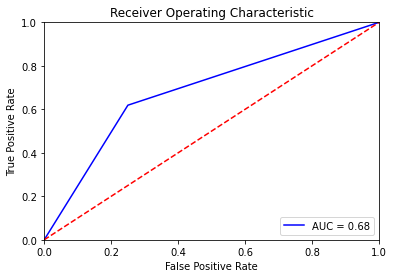

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.763
0.6829268292682927
[[12  8]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.6829268292682927


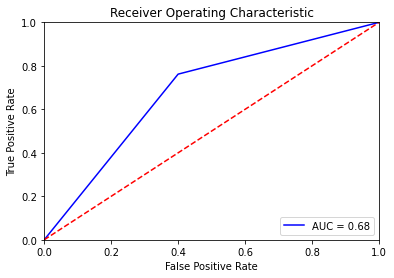

[0.6666666666666666, 0.42857142857142855, 0.19047619047619047, 0.6190476190476191, 0.7619047619047619] [0.7560975609756098, 0.5853658536585366, 0.5853658536585366, 0.6829268292682927, 0.6829268292682927] [0.7583333333333333, 0.5892857142857143, 0.5952380952380952, 0.6845238095238095, 0.680952380952381]


In [68]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])



print(sensi, accuracy, roc)

In [69]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model_FS.append("SVM")
mean_FS.append(media_svc)
std_FS.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2_FS.append("SVM")
mean2_FS.append(media_svc2)
std2_FS.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.6585365853658537 0.0731707317073171
0.6616666666666666 0.07051700073237835
0.5333333333333333 0.22687865237279228
0.79 0.14747881203752627


# Decision Tree

(160, 3) (160,) (41, 3) (41,)
[[-1.08499752 -0.93977822 -0.73072123]
 [-1.08499752 -0.099753    0.12267583]
 [-1.08499752 -0.099753   -0.73072123]
 [-1.08499752 -0.93977822 -0.73072123]
 [ 1.50604133  1.58029746  0.12267583]
 [ 2.36972095  2.42032269  1.82946994]
 [-1.08499752 -0.099753   -0.73072123]
 [-0.2213179  -0.099753    0.97607288]
 [-1.08499752 -0.93977822 -1.58411829]
 [-0.2213179  -0.099753    0.12267583]
 [-1.08499752 -0.93977822  1.82946994]
 [ 0.64236172 -0.93977822  0.12267583]
 [-1.08499752 -0.93977822 -1.58411829]
 [-0.2213179   0.74027223  1.82946994]
 [ 0.64236172 -0.099753    0.12267583]
 [ 0.64236172  1.58029746  0.97607288]
 [ 0.64236172 -0.93977822 -0.73072123]
 [-0.2213179   0.74027223  0.12267583]
 [-1.08499752 -0.93977822 -0.73072123]
 [-1.08499752 -0.93977822  0.12267583]
 [-1.08499752 -0.93977822  0.12267583]
 [-1.08499752 -0.099753    0.12267583]
 [-1.08499752 -0.93977822  0.12267583]
 [-0.2213179  -0.93977822  0.12267583]
 [ 1.50604133  0.74027223  0.12267

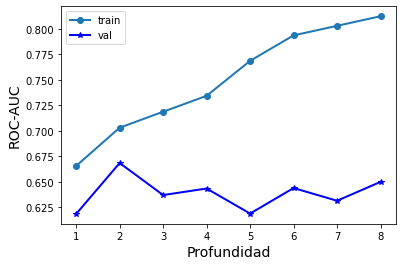

Mejor ROC-AUC en validación cruzada: 0.668
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.7804878048780488
[[18  2]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.7804878048780488


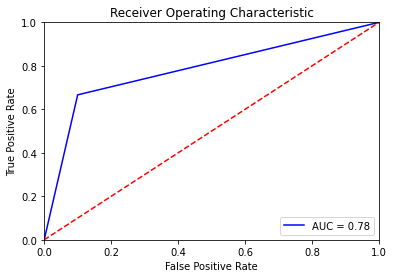

(160, 3) (160,) (41, 3) (41,)
[[-0.15532561 -0.04267896  1.93724713]
 [-1.04290055 -0.89625816 -1.478285  ]
 [-0.15532561 -0.04267896  0.22948106]
 [ 0.73224932  0.81090024  1.0833641 ]
 [-0.15532561 -0.04267896  1.0833641 ]
 [ 0.73224932  1.66447944  1.0833641 ]
 [-0.15532561 -0.04267896  1.0833641 ]
 [-0.15532561  0.81090024 -0.62440197]
 [ 1.61982426  1.66447944  1.0833641 ]
 [ 0.73224932 -0.89625816 -0.62440197]
 [ 0.73224932  0.81090024  0.22948106]
 [-1.04290055 -0.89625816  1.93724713]
 [-0.15532561 -0.89625816  0.22948106]
 [ 0.73224932 -0.89625816 -1.478285  ]
 [-1.04290055 -0.89625816 -1.478285  ]
 [-0.15532561 -0.04267896  1.0833641 ]
 [ 0.73224932 -0.89625816 -1.478285  ]
 [-0.15532561 -0.04267896  0.22948106]
 [-0.15532561 -0.04267896  1.0833641 ]
 [ 2.50739919  2.51805864  1.93724713]
 [-1.04290055 -0.89625816 -1.478285  ]
 [-0.15532561 -0.89625816 -0.62440197]
 [ 0.73224932  0.81090024  0.22948106]
 [ 1.61982426 -0.89625816  1.0833641 ]
 [ 1.61982426  2.51805864  0.22948

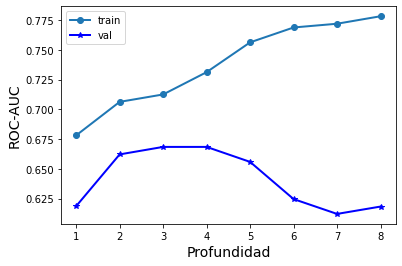

Mejor ROC-AUC en validación cruzada: 0.668
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6829268292682927
[[14  6]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.6829268292682927


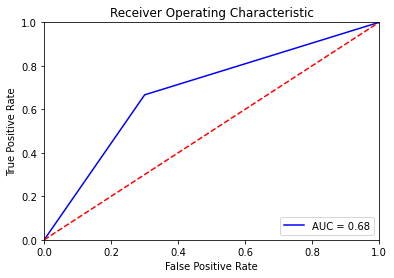

(160, 3) (160,) (41, 3) (41,)
[[ 0.69920734  1.66629498  1.05781064]
 [-0.1816838   0.79502963  1.05781064]
 [ 2.46098963  2.53756033  1.91260712]
 [ 0.69920734 -0.07623572  0.20301416]
 [-1.06257494  0.79502963  1.05781064]
 [-1.06257494 -0.94750107 -0.65178231]
 [-0.1816838  -0.94750107  0.20301416]
 [-0.1816838   0.79502963  1.91260712]
 [-1.06257494  0.79502963  0.20301416]
 [-0.1816838  -0.94750107 -0.65178231]
 [-1.06257494 -0.94750107 -0.65178231]
 [ 1.58009849  0.79502963  0.20301416]
 [-1.06257494 -0.94750107 -1.50657879]
 [-1.06257494 -0.94750107 -0.65178231]
 [ 2.46098963  2.53756033  1.91260712]
 [-1.06257494 -0.94750107 -0.65178231]
 [ 0.69920734 -0.94750107 -1.50657879]
 [-0.1816838  -0.07623572 -0.65178231]
 [-0.1816838   0.79502963  0.20301416]
 [-1.06257494 -0.94750107 -1.50657879]
 [-1.06257494 -0.07623572 -0.65178231]
 [-0.1816838  -0.07623572  1.05781064]
 [-1.06257494 -0.94750107 -0.65178231]
 [-1.06257494 -0.94750107  0.20301416]
 [-0.1816838  -0.07623572 -1.50657

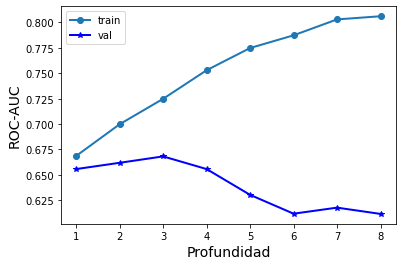

Mejor ROC-AUC en validación cruzada: 0.668
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5853658536585366
[[ 7 13]
 [ 4 17]]
Sensibilidad y Accuracy 0.8095238095238095 0.5853658536585366


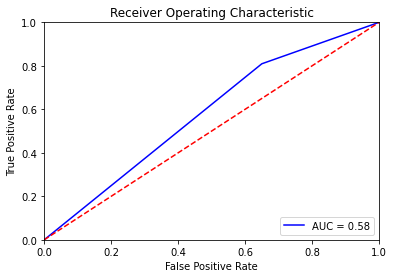

(160, 3) (160,) (41, 3) (41,)
[[ 1.68720494 -0.95181727  1.02756313]
 [ 0.76899817 -0.95181727  0.18008838]
 [ 1.68720494 -0.95181727  1.02756313]
 [ 0.76899817  2.6314948   0.18008838]
 [-0.1492086   0.83983877  0.18008838]
 [ 2.60541171  2.6314948   1.87503787]
 [-1.06741537 -0.95181727 -1.51486111]
 [-0.1492086  -0.05598925 -0.66738636]
 [-1.06741537 -0.05598925  0.18008838]
 [ 0.76899817 -0.95181727  0.18008838]
 [-1.06741537 -0.95181727 -1.51486111]
 [ 0.76899817  2.6314948   1.02756313]
 [-1.06741537  0.83983877  0.18008838]
 [ 1.68720494 -0.95181727 -1.51486111]
 [-0.1492086  -0.05598925  0.18008838]
 [-0.1492086  -0.05598925 -0.66738636]
 [ 0.76899817 -0.05598925  1.87503787]
 [ 1.68720494  2.6314948  -0.66738636]
 [-0.1492086   1.73566678  1.02756313]
 [-0.1492086  -0.05598925  1.02756313]
 [-1.06741537 -0.05598925 -1.51486111]
 [ 0.76899817  1.73566678  1.02756313]
 [-1.06741537 -0.95181727 -0.66738636]
 [-1.06741537 -0.95181727 -0.66738636]
 [-0.1492086   0.83983877  0.18008

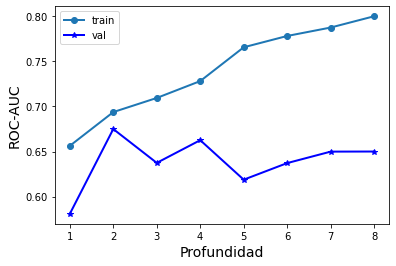

Mejor ROC-AUC en validación cruzada: 0.675
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6341463414634146
[[10 10]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.6341463414634146


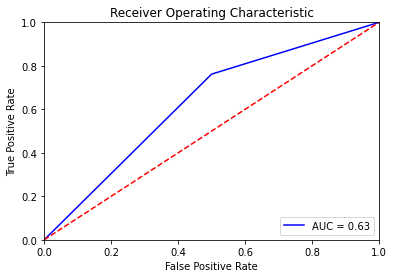

(160, 3) (160,) (41, 3) (41,)
[[-1.02036961 -0.96490128  0.19974919]
 [-1.02036961  0.75047877  1.06352949]
 [-1.02036961 -0.96490128 -0.66403111]
 [-0.16560973 -0.10721125 -0.66403111]
 [ 0.68915016 -0.10721125  0.19974919]
 [ 0.68915016  0.75047877  0.19974919]
 [-0.16560973 -0.10721125 -0.66403111]
 [-0.16560973  0.75047877  0.19974919]
 [-0.16560973  0.75047877  1.92730979]
 [-0.16560973  0.75047877  0.19974919]
 [-0.16560973 -0.10721125  1.06352949]
 [-0.16560973 -0.10721125  1.06352949]
 [ 2.39866992  2.46585883  1.06352949]
 [ 0.68915016  1.6081688   1.06352949]
 [-1.02036961 -0.96490128 -1.5278114 ]
 [-0.16560973 -0.10721125  1.06352949]
 [-0.16560973  0.75047877  1.92730979]
 [ 0.68915016 -0.96490128 -1.5278114 ]
 [-1.02036961 -0.96490128  0.19974919]
 [-0.16560973 -0.10721125  1.06352949]
 [-1.02036961 -0.96490128 -1.5278114 ]
 [ 0.68915016 -0.10721125  0.19974919]
 [-1.02036961 -0.96490128 -0.66403111]
 [ 2.39866992  2.46585883  1.92730979]
 [-1.02036961 -0.96490128 -1.52781

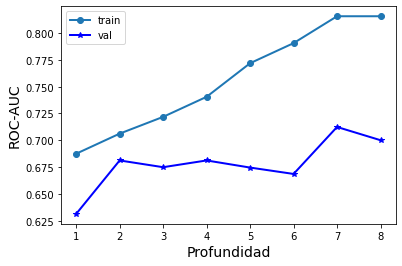

Mejor ROC-AUC en validación cruzada: 0.712
Mejor valor del hiperparámetro: {'max_depth': 7}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5609756097560976
[[ 9 11]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.5609756097560976


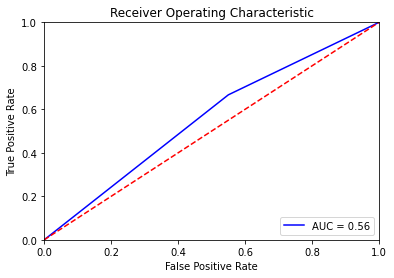

In [70]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = decisionTree(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [71]:
media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...


model2_FS.append("DT")
mean2_FS.append(media_log)
std2_FS.append(desviacion_estandar_log)


print(media_log, desviacion_estandar_log)


media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...


model_FS.append("DT")
mean_FS.append(media_sen_logarit)
std_FS.append(desviacion_estandar_sen_logarit)
print(media_sen_logarit, desviacion_estandar_sen_logarit)

media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.6471428571428571 0.09020400788517521
0.6487804878048781 0.08726118936584545
0.7142857142857143 0.06734350297014739
0.58 0.21965882636488795


# Regresión logística

(160, 17) (160,) (41, 17) (41,)
[0.03253097]
[[-0.27898804  0.42112005 -0.23462236  0.1353526  -0.24668227  0.04593248
   0.60432658  0.18699355 -0.46788416  0.15062359 -0.07352008  0.22004765
   0.35261478 -0.04209259  0.04702871  0.0258959   0.0090103 ]]
[[17  3]
 [ 6 15]]
tn: 17, fp:3, fn:6, tp:15
Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

Non-diabetic       0.74      0.85      0.79        20
    Diabetic       0.83      0.71      0.77        21

    accuracy                           0.78        41
   macro avg       0.79      0.78      0.78        41
weighted avg       0.79      0.78      0.78        41

Sensibilidad: 0.7142857142857143


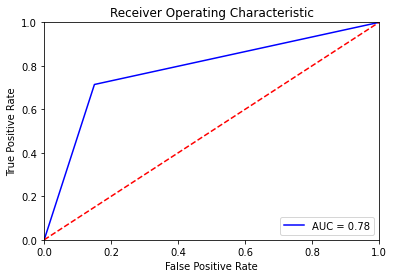

(160, 17) (160,) (41, 17) (41,)
[0.03691049]
[[-0.44310257  0.30576378 -0.3100085   0.24726803 -0.25249463  0.13841551
   0.68241805  0.32565874 -0.50169159  0.20374671  0.11505194 -0.01894344
   0.45202479 -0.10805442 -0.04962437  0.0257417   0.02310421]]
[[12  8]
 [ 5 16]]
tn: 12, fp:8, fn:5, tp:16
Accuracy: 0.6829268292682927
              precision    recall  f1-score   support

Non-diabetic       0.71      0.60      0.65        20
    Diabetic       0.67      0.76      0.71        21

    accuracy                           0.68        41
   macro avg       0.69      0.68      0.68        41
weighted avg       0.69      0.68      0.68        41

Sensibilidad: 0.7619047619047619


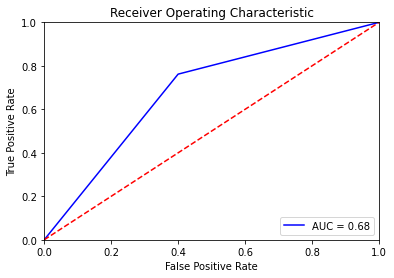

(160, 17) (160,) (41, 17) (41,)
[0.0265611]
[[-0.34189612  0.40271544 -0.16755683  0.00642135 -0.26379537  0.16721301
   0.42989156 -0.02443703 -0.28325689  0.19999842  0.06244172  0.35398878
   0.39978718  0.05189838 -0.04382405  0.04237525 -0.13747155]]
[[13  7]
 [ 7 14]]
tn: 13, fp:7, fn:7, tp:14
Accuracy: 0.6585365853658537
              precision    recall  f1-score   support

Non-diabetic       0.65      0.65      0.65        20
    Diabetic       0.67      0.67      0.67        21

    accuracy                           0.66        41
   macro avg       0.66      0.66      0.66        41
weighted avg       0.66      0.66      0.66        41

Sensibilidad: 0.6666666666666666


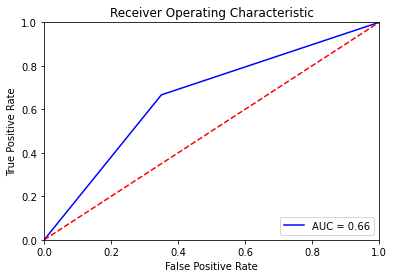

(160, 17) (160,) (41, 17) (41,)
[0.04100982]
[[-0.20999821  0.34507991 -0.2378541   0.26853991 -0.35901078  0.08636178
   0.5510624   0.12433463 -0.39637219  0.170251    0.1047764   0.13868496
   0.57255351  0.01784081  0.14720976  0.1051954  -0.38705224]]
[[12  8]
 [ 6 15]]
tn: 12, fp:8, fn:6, tp:15
Accuracy: 0.6585365853658537
              precision    recall  f1-score   support

Non-diabetic       0.67      0.60      0.63        20
    Diabetic       0.65      0.71      0.68        21

    accuracy                           0.66        41
   macro avg       0.66      0.66      0.66        41
weighted avg       0.66      0.66      0.66        41

Sensibilidad: 0.7142857142857143


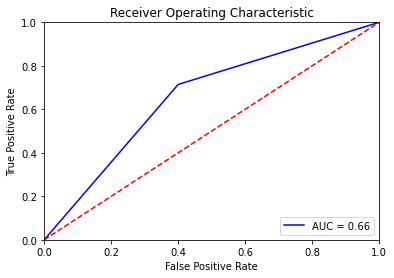

(160, 17) (160,) (41, 17) (41,)
[0.04359684]
[[-0.15965408  0.25338249 -0.24315574  0.22805153 -0.39589911  0.162193
   0.67873992 -0.19157646 -0.27309703  0.25526663  0.25966517  0.15253998
   0.44320028 -0.11760713  0.06135462 -0.21560471  0.0968454 ]]
[[ 7 13]
 [ 6 15]]
tn: 7, fp:13, fn:6, tp:15
Accuracy: 0.5365853658536586
              precision    recall  f1-score   support

Non-diabetic       0.54      0.35      0.42        20
    Diabetic       0.54      0.71      0.61        21

    accuracy                           0.54        41
   macro avg       0.54      0.53      0.52        41
weighted avg       0.54      0.54      0.52        41

Sensibilidad: 0.7142857142857143


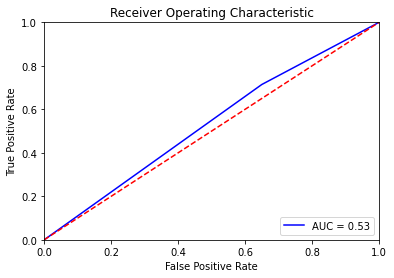

In [72]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS2, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = regr_Logistica(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])

In [73]:
import statistics
media_logarit_FS = statistics.mean(accuracy) # 7
desviacion_estandar_reglog_FS = statistics.stdev(accuracy) # 5.164...


#model_FS.append("Regr_Log")
#mean_FS.append(media_logarit_FS)
#std_FS.append(desviacion_estandar_reglog_FS)

# Reg. Logística Lasso

(160, 3) (160,) (41, 3) (41,)
{'C': 10}
0.65625
[[17  3]
 [ 7 14]]
tn: 17, fp:3, fn:7, tp:14
Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

Non-diabetic       0.71      0.85      0.77        20
    Diabetic       0.82      0.67      0.74        21

    accuracy                           0.76        41
   macro avg       0.77      0.76      0.75        41
weighted avg       0.77      0.76      0.75        41

Sensibilidad: 0.6666666666666666


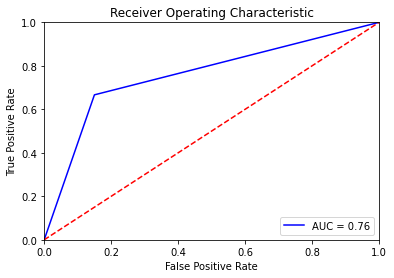

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.65
[[12  8]
 [ 5 16]]
tn: 12, fp:8, fn:5, tp:16
Accuracy: 0.6829268292682927
              precision    recall  f1-score   support

Non-diabetic       0.71      0.60      0.65        20
    Diabetic       0.67      0.76      0.71        21

    accuracy                           0.68        41
   macro avg       0.69      0.68      0.68        41
weighted avg       0.69      0.68      0.68        41

Sensibilidad: 0.7619047619047619


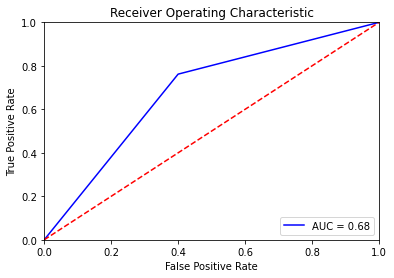

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.64375
[[14  6]
 [ 7 14]]
tn: 14, fp:6, fn:7, tp:14
Accuracy: 0.6829268292682927
              precision    recall  f1-score   support

Non-diabetic       0.67      0.70      0.68        20
    Diabetic       0.70      0.67      0.68        21

    accuracy                           0.68        41
   macro avg       0.68      0.68      0.68        41
weighted avg       0.68      0.68      0.68        41

Sensibilidad: 0.6666666666666666


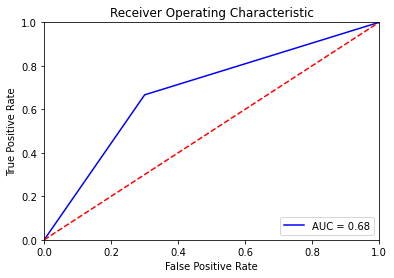

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.69375
[[13  7]
 [ 8 13]]
tn: 13, fp:7, fn:8, tp:13
Accuracy: 0.6341463414634146
              precision    recall  f1-score   support

Non-diabetic       0.62      0.65      0.63        20
    Diabetic       0.65      0.62      0.63        21

    accuracy                           0.63        41
   macro avg       0.63      0.63      0.63        41
weighted avg       0.63      0.63      0.63        41

Sensibilidad: 0.6190476190476191


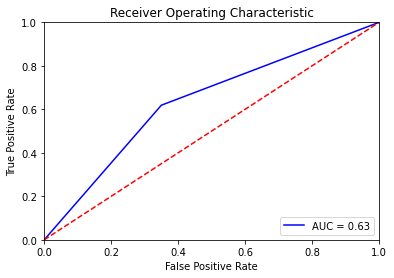

(160, 3) (160,) (41, 3) (41,)
{'C': 5}
0.68125
[[ 9 11]
 [ 5 16]]
tn: 9, fp:11, fn:5, tp:16
Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

Non-diabetic       0.64      0.45      0.53        20
    Diabetic       0.59      0.76      0.67        21

    accuracy                           0.61        41
   macro avg       0.62      0.61      0.60        41
weighted avg       0.62      0.61      0.60        41

Sensibilidad: 0.7619047619047619


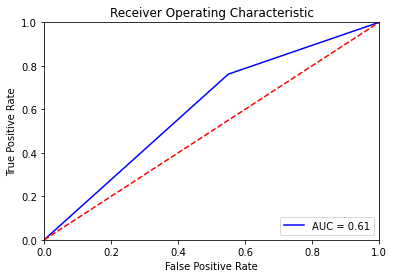

In [74]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = reg_Lasso(X_train_mlp_norm, X_test_mlp_norm, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [75]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model_FS.append("LASSO")
mean_FS.append(media_lasso)
std_FS.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2_FS.append("LASSO")
mean2_FS.append(media_lasso2)
std2_FS.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

0.6731707317073171 0.05615055821083581
0.6726190476190476 0.05793718742806584
0.6952380952380952 0.06388765649999398


In [76]:

media_lasso4 = statistics.mean(espe) # 7
desviacion_estandar_lasso4 = statistics.stdev(espe) # 5.164...
print(media_lasso4, desviacion_estandar_lasso4)

0.65 0.1457737973711325


In [77]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model_FS
df_metrics["mean"] = mean_FS
df_metrics["std"] = std_FS

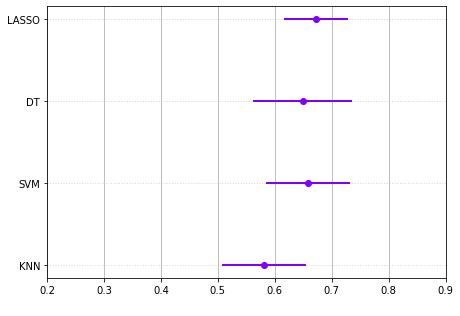

In [78]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)


In [79]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2_FS
df_metrics2["mean"] = mean2_FS
df_metrics2["std"] = std2_FS

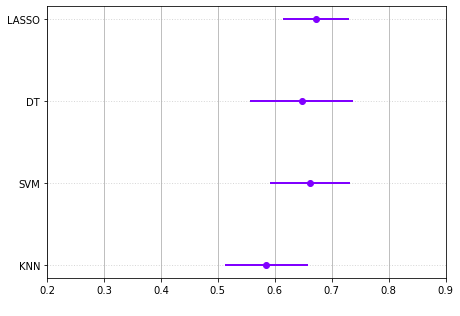

In [80]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)
